In [28]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from hampel import hampel
from scipy.signal import savgol_filter

In [29]:
assenza_rx1 = pd.read_csv('Dati_4_link/Assenzarx1.csv')
assenza_rx2= pd.read_csv('Dati_4_link/Assenzarx2.csv')

una_movimento_rx1=pd.read_csv('Dati_4_link/Una_movimentorx1.csv')
una_movimento_rx2=pd.read_csv('Dati_4_link/Una_movimentorx2.csv')

una_ferma_rx1=pd.read_csv('Dati_4_link/Una_fermarx1.csv')
una_ferma_rx2=pd.read_csv('Dati_4_link/Una_fermarx2.csv')

due_movimento_rx1=pd.read_csv('Dati_4_link/Due_movimentorx1.csv')
due_movimento_rx2=pd.read_csv('Dati_4_link/Due_movimentorx2.csv')

due_ferme_rx1=pd.read_csv('Dati_4_link/Due_fermerx1.csv')
due_ferme_rx2=pd.read_csv('Dati_4_link/Due_fermerx2.csv')

tre_ferme_rx1=pd.read_csv('Dati_4_link/Tre_fermerx1.csv')
tre_ferme_rx2=pd.read_csv('Dati_4_link/Tre_fermerx2.csv')

In [30]:
def unify_and_sort_data(rx1_data, rx2_data):
    """
    Unisce i dati dei due ricevitori (rx1 e rx2) utilizzando la colonna 'host_time_ms'
    come chiave, ordina i dati per timestamp e aggiunge un identificatore per ciascun ricevitore.
    
    :param rx1_data: DataFrame contenente i dati del primo ricevitore
    :param rx2_data: DataFrame contenente i dati del secondo ricevitore
    :return: DataFrame unificato e ordinato
    """
    
    # Converte la colonna 'host_time_ms' in formato datetime
    rx1_data['host_time_ms'] = pd.to_datetime(rx1_data['host_time_ms'])
    rx2_data['host_time_ms'] = pd.to_datetime(rx2_data['host_time_ms'])
    
    # Aggiungi un identificatore per il ricevitore
    rx1_data['rx'] = 'rx1'
    rx2_data['rx'] = 'rx2'
    
    # Unisce i due DataFrame usando la colonna 'host_time_ms'
    df_combined = pd.concat([rx1_data, rx2_data], ignore_index=True)
    
    # Ordina i dati in base al timestamp 'host_time_ms'
    df_combined.sort_values(by='host_time_ms', inplace=True)
    
    return df_combined

In [31]:
def convert_to_complex(csi_data):
    # Assumiamo che csi_data sia una lista con alternanza di I e Q
    complex_data = []
    for i in range(0, len(csi_data), 2):  # passo di 2 per prendere I e Q
        real = csi_data[i]
        imag = csi_data[i+1] if i+1 < len(csi_data) else 0
        complex_data.append(complex(real, imag))
    return complex_data

In [32]:
# convertiamo le stringhe in liste di numeri 

assenza_rx1['data'] = assenza_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
assenza_rx2['data'] = assenza_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

una_movimento_rx1['data'] = una_movimento_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
una_movimento_rx2['data'] = una_movimento_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
una_ferma_rx1['data'] = una_ferma_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
una_ferma_rx2['data'] = una_ferma_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

due_movimento_rx1['data'] = due_movimento_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
due_movimento_rx2['data'] = due_movimento_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

due_ferme_rx1['data'] = due_ferme_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
due_ferme_rx2['data'] = due_ferme_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

tre_ferme_rx1['data'] = tre_ferme_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
tre_ferme_rx2['data'] = tre_ferme_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [33]:
#trasformo i dati in numeri complessi
assenza_rx1['data_complex'] = assenza_rx1['data'].apply(convert_to_complex)
assenza_rx2['data_complex'] = assenza_rx2['data'].apply(convert_to_complex)

una_movimento_rx1['data_complex'] = una_movimento_rx1['data'].apply(convert_to_complex)
una_movimento_rx2['data_complex'] = una_movimento_rx2['data'].apply(convert_to_complex)

una_ferma_rx1['data_complex'] = una_ferma_rx1['data'].apply(convert_to_complex)
una_ferma_rx2['data_complex'] = una_ferma_rx2['data'].apply(convert_to_complex)

due_movimento_rx1['data_complex'] = due_movimento_rx1['data'].apply(convert_to_complex)
due_movimento_rx2['data_complex'] = due_movimento_rx2['data'].apply(convert_to_complex)

due_ferme_rx1['data_complex'] = due_ferme_rx1['data'].apply(convert_to_complex)
due_ferme_rx2['data_complex'] = due_ferme_rx2['data'].apply(convert_to_complex)

tre_ferme_rx1['data_complex'] = tre_ferme_rx1['data'].apply(convert_to_complex)
tre_ferme_rx2['data_complex'] = tre_ferme_rx2['data'].apply(convert_to_complex)



In [34]:
# Seleziona solo le colonne di interesse
columns_to_keep = ['data_complex', 'host_time_ms', 'mac']

# Rimuovi tutte le altre colonne
assenza_rx1_cleaned = assenza_rx1[columns_to_keep]
assenza_rx2_cleaned = assenza_rx2[columns_to_keep]

una_movimento_rx1_cleaned = una_movimento_rx1[columns_to_keep]
una_movimento_rx2_cleaned = una_movimento_rx2[columns_to_keep]

una_ferma_rx1_cleaned = una_ferma_rx1[columns_to_keep]
una_ferma_rx2_cleaned = una_ferma_rx2[columns_to_keep]

due_movimento_rx1_cleaned = due_movimento_rx1[columns_to_keep]
due_movimento_rx2_cleaned = due_movimento_rx2[columns_to_keep]

due_ferme_rx1_cleaned = due_ferme_rx1[columns_to_keep]
due_ferme_rx2_cleaned = due_ferme_rx2[columns_to_keep]

tre_ferme_rx1_cleaned = tre_ferme_rx1[columns_to_keep]
tre_ferme_rx2_cleaned = tre_ferme_rx2[columns_to_keep]    

In [35]:
# Separiamo i numeri complessi in colonne direttamente nel DataFrame originale
assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx1_cleaned['data_complex'].tolist(), index=assenza_rx1_cleaned.index)
assenza_rx2_cleaned[[f'{i}' for i in range(len(assenza_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx2_cleaned['data_complex'].tolist(), index=assenza_rx2_cleaned.index)

una_movimento_rx1_cleaned[[f'{i}' for i in range(len(una_movimento_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_movimento_rx1_cleaned['data_complex'].tolist(), index=una_movimento_rx1_cleaned.index)
una_movimento_rx2_cleaned[[f'{i}' for i in range(len(una_movimento_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_movimento_rx2_cleaned['data_complex'].tolist(), index=una_movimento_rx2_cleaned.index)

una_ferma_rx1_cleaned[[f'{i}' for i in range(len(una_ferma_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_ferma_rx1_cleaned['data_complex'].tolist(), index=una_ferma_rx1_cleaned.index)
una_ferma_rx2_cleaned[[f'{i}' for i in range(len(una_ferma_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_ferma_rx2_cleaned['data_complex'].tolist(), index=una_ferma_rx2_cleaned.index)

due_movimento_rx1_cleaned[[f'{i}' for i in range(len(due_movimento_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_movimento_rx1_cleaned['data_complex'].tolist(), index=due_movimento_rx1_cleaned.index)
due_movimento_rx2_cleaned[[f'{i}' for i in range(len(due_movimento_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_movimento_rx2_cleaned['data_complex'].tolist(), index=due_movimento_rx2_cleaned.index)

due_ferme_rx1_cleaned[[f'{i}' for i in range(len(due_ferme_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_ferme_rx1_cleaned['data_complex'].tolist(), index=due_ferme_rx1_cleaned.index)
due_ferme_rx2_cleaned[[f'{i}' for i in range(len(due_ferme_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_ferme_rx2_cleaned['data_complex'].tolist(), index=due_ferme_rx2_cleaned.index)

tre_ferme_rx1_cleaned[[f'{i}' for i in range(len(tre_ferme_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(tre_ferme_rx1_cleaned['data_complex'].tolist(), index=tre_ferme_rx1_cleaned.index)
tre_ferme_rx2_cleaned[[f'{i}' for i in range(len(tre_ferme_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(tre_ferme_rx2_cleaned['data_complex'].tolist(), index=tre_ferme_rx2_cleaned.index)


C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\790311089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx1_cleaned['data_complex'].tolist(), index=assenza_rx1_cleaned.index)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\790311089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd

In [36]:
# Rimuoviamo la colonna originale dei numeri complessi che ora sono state separate in colonne individuali

assenza_rx1_cleaned= assenza_rx1_cleaned.drop(columns=['data_complex'])
assenza_rx2_cleaned= assenza_rx2_cleaned.drop(columns=['data_complex'])

una_movimento_rx1_cleaned= una_movimento_rx1_cleaned.drop(columns=['data_complex'])
una_movimento_rx2_cleaned= una_movimento_rx2_cleaned.drop(columns=['data_complex'])

una_ferma_rx1_cleaned= una_ferma_rx1_cleaned.drop(columns=['data_complex'])
una_ferma_rx2_cleaned= una_ferma_rx2_cleaned.drop(columns=['data_complex'])

due_movimento_rx1_cleaned= due_movimento_rx1_cleaned.drop(columns=['data_complex'])
due_movimento_rx2_cleaned= due_movimento_rx2_cleaned.drop(columns=['data_complex'])

due_ferme_rx1_cleaned= due_ferme_rx1_cleaned.drop(columns=['data_complex'])
due_ferme_rx2_cleaned= due_ferme_rx2_cleaned.drop(columns=['data_complex'])

tre_ferme_rx1_cleaned= tre_ferme_rx1_cleaned.drop(columns=['data_complex'])
tre_ferme_rx2_cleaned= tre_ferme_rx2_cleaned.drop(columns=['data_complex'])


In [37]:
def split_csi_dataset(df: pd.DataFrame):
    """
    Divide un DataFrame CSI in due dataset separati:
      - LLTF (0..63)
      - HT-LTF (-64..-1, 0..63)
    
    Restituisce:
      lltf_data_df, htltf_data_df
    """
    # --- 0) Meta colonne da tenere (solo quelle presenti davvero) ---
    candidate_meta = ["rx", "host_time_ms", "mac"]
    meta_cols = [c for c in candidate_meta if c in df.columns]

    # --- 1) Mappa colonne 'numeric-like' -> interi ---
    numlike_map = {}
    for c in df.columns:
        try:
            ci = int(c)
            numlike_map[c] = ci
        except Exception:
            pass
    if numlike_map:
        df = df.rename(columns=numlike_map)

    # --- 2) Se NON abbiamo le 192 colonne 0..191, prova da 'data_complex' ---
    needed_cols = list(range(192))
    missing_numeric = [c for c in needed_cols if c not in df.columns]

    if missing_numeric:
        if "data_complex" not in df.columns:
            raise ValueError("Non trovo né le colonne 0..191 né la colonna 'data_complex'.")
        expanded = pd.DataFrame(
            df["data_complex"].apply(
                lambda x: list(x) if isinstance(x, (list, tuple, np.ndarray)) else np.nan
            ).tolist(),
            index=df.index
        )
        expanded.columns = list(range(expanded.shape[1]))
        if expanded.shape[1] < 192:
            raise ValueError(f"'data_complex' non ha 192 elementi (ne ha {expanded.shape[1]}).")
        expanded = expanded[needed_cols]
        for c in needed_cols:
            if c not in df.columns:
                df[c] = expanded[c]

    # --- 3) Indici sorgente ---
    lltf_src   = list(range(0, 64))       # 0..63
    ht_pos_src = list(range(64, 128))     # 64..127
    ht_neg_src = list(range(128, 192))    # 128..191

    # --- 4) Costruisci i due dataset ---
    lltf_df = pd.concat([df[meta_cols], df[lltf_src]], axis=1)

    htltf_part = pd.concat([df[ht_pos_src], df[ht_neg_src]], axis=1)
    htltf_part.columns = list(range(0, 64)) + list(range(-64, 0))
    ordered = list(range(-64, 0)) + list(range(0, 64))
    htltf_df = pd.concat([df[meta_cols], htltf_part[ordered]], axis=1)

    # --- 5) Rimuovi colonne sempre 0 ---
    def clean_zero_only(data_df):
        data_cols = [c for c in data_df.columns if c not in meta_cols]
        vals = data_df[data_cols].applymap(
            lambda z: 0+0j if (z is None or (isinstance(z, float) and np.isnan(z))) else complex(z)
        )
        mask_keep = (vals.to_numpy() != 0).any(axis=0)
        cols_to_keep = [col for col, keep in zip(data_cols, mask_keep) if keep]
        return pd.concat([data_df[meta_cols], data_df[cols_to_keep]], axis=1)

    lltf_cleaned = clean_zero_only(lltf_df)
    htltf_cleaned = clean_zero_only(htltf_df)

    return lltf_cleaned, htltf_cleaned


In [38]:
lltf_assenza_rx1, htltf_assenza_rx1 = split_csi_dataset(assenza_rx1_cleaned)
lltf_assenza_rx2, htltf_assenza_rx2 = split_csi_dataset(assenza_rx2_cleaned)

lltf_una_movimento_rx1, htltf_una_movimento_rx1 = split_csi_dataset(una_movimento_rx1_cleaned)
lltf_una_movimento_rx2, htltf_una_movimento_rx2 = split_csi_dataset(una_movimento_rx2_cleaned)

lltf_una_ferma_rx1, htltf_una_ferma_rx1 = split_csi_dataset(una_ferma_rx1_cleaned)
lltf_una_ferma_rx2, htltf_una_ferma_rx2 = split_csi_dataset(una_ferma_rx2_cleaned)

lltf_due_movimento_rx1, htltf_due_movimento_rx1 = split_csi_dataset(due_movimento_rx1_cleaned)
lltf_due_movimento_rx2, htltf_due_movimento_rx2 = split_csi_dataset(due_movimento_rx2_cleaned)

lltf_due_ferme_rx1, htltf_due_ferme_rx1 = split_csi_dataset(due_ferme_rx1_cleaned)
lltf_due_ferme_rx2, htltf_due_ferme_rx2 = split_csi_dataset(due_ferme_rx2_cleaned)

lltf_tre_ferme_rx1, htltf_tre_ferme_rx1 = split_csi_dataset(tre_ferme_rx1_cleaned)
lltf_tre_ferme_rx2, htltf_tre_ferme_rx2 = split_csi_dataset(tre_ferme_rx2_cleaned)


C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\1148539549

In [39]:
#levo le sottoportanti pilota  -53, -25, -11, +11, +25, +53, queste sono indicate nel documento esp 
def remove_pilot_subcarriers(df):
    pilot_indices = [-53, -25, -11, 11, 25, 53]
    cols_to_remove = [col for col in pilot_indices if col in df.columns]
    df_cleaned = df.drop(columns=cols_to_remove)
    return df_cleaned

htltf_assenza_rx1 = remove_pilot_subcarriers(htltf_assenza_rx1)
htltf_assenza_rx2 = remove_pilot_subcarriers(htltf_assenza_rx2)

htltf_due_movimento_rx1 = remove_pilot_subcarriers(htltf_due_movimento_rx1)
htltf_due_movimento_rx2 = remove_pilot_subcarriers(htltf_due_movimento_rx2)

htltf_due_ferme_rx1 = remove_pilot_subcarriers(htltf_due_ferme_rx1)
htltf_due_ferme_rx2 = remove_pilot_subcarriers(htltf_due_ferme_rx2)

htltf_una_movimento_rx1 = remove_pilot_subcarriers(htltf_una_movimento_rx1)
htltf_una_movimento_rx2 = remove_pilot_subcarriers(htltf_una_movimento_rx2)

htltf_una_ferma_rx1 = remove_pilot_subcarriers(htltf_una_ferma_rx1)
htltf_una_ferma_rx2 = remove_pilot_subcarriers(htltf_una_ferma_rx2)

htltf_tre_ferme_rx1 = remove_pilot_subcarriers(htltf_tre_ferme_rx1)
htltf_tre_ferme_rx2 = remove_pilot_subcarriers(htltf_tre_ferme_rx2)


In [40]:
#recupero gli indici delle sottoportanti 
subcarriers_htltf = [col for col in htltf_assenza_rx1.columns if col not in ['host_time_ms','rx','mac']]

subcarriers_lltf=[col for col in lltf_assenza_rx1.columns if col not in ['host_time_ms','rx','mac']]

#calcolo quante sono 
num_subcarriers_htltf = len(subcarriers_htltf)

num_subcarriers_lltf = len(subcarriers_lltf)    

In [41]:
def drop_time_window(df, time_col='local_timestamp', seconds=60, mode='head'):
    """
    Rimuove dal DataFrame tutte le righe dei primi o ultimi `seconds` secondi,
    sulla base della colonna temporale `time_col`.
    - mode='head' rimuove i primi N secondi
    - mode='tail' rimuove gli ultimi N secondi
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    if mode == 'head':
        t0 = df[time_col].min()
        mask = df[time_col] >= (t0 + pd.Timedelta(seconds=seconds))
    elif mode == 'tail':
        t_end = df[time_col].max()
        mask = df[time_col] <= (t_end - pd.Timedelta(seconds=seconds))
    else:
        raise ValueError("mode deve essere 'head' oppure 'tail'")
    return df[mask].reset_index(drop=True)

In [42]:
# in questa sezione tolgo i primi e gli ultimi secondi di ogni acquisizione per eliminare i momenti in cui le persone non fanno il training
# QUESTO PER LE LLTF
lltf_assenza_rx1 = drop_time_window(lltf_assenza_rx1, time_col='host_time_ms', seconds=180, mode='head')
lltf_assenza_rx2 = drop_time_window(lltf_assenza_rx2, time_col='host_time_ms', seconds=180, mode='head')

lltf_due_movimento_rx1 = drop_time_window(lltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head') 
lltf_due_movimento_rx2 = drop_time_window(lltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

lltf_due_ferme_rx1 = drop_time_window(lltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='head')
lltf_due_ferme_rx2 = drop_time_window(lltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='head')

lltf_una_movimento_rx1 = drop_time_window(lltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head')
lltf_una_movimento_rx2 = drop_time_window(lltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

lltf_una_ferma_rx1 = drop_time_window(lltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='head')
lltf_una_ferma_rx2 = drop_time_window(lltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='head')

lltf_tre_ferme_rx1 = drop_time_window(lltf_tre_ferme_rx1, time_col='host_time_ms', seconds=120, mode='head')
lltf_tre_ferme_rx2 = drop_time_window(lltf_tre_ferme_rx2, time_col='host_time_ms', seconds=120, mode='head')

lltf_assenza_rx1 = drop_time_window(lltf_assenza_rx1, time_col='host_time_ms', seconds=120, mode='tail')
lltf_assenza_rx2 = drop_time_window(lltf_assenza_rx2, time_col='host_time_ms', seconds=120, mode='tail')

lltf_due_movimento_rx1 = drop_time_window(lltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail') 
lltf_due_movimento_rx2 = drop_time_window(lltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

lltf_due_ferme_rx1 = drop_time_window(lltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
lltf_due_ferme_rx2 = drop_time_window(lltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

lltf_una_movimento_rx1 = drop_time_window(lltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail')
lltf_una_movimento_rx2 = drop_time_window(lltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

lltf_una_ferma_rx1 = drop_time_window(lltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='tail')
lltf_una_ferma_rx2 = drop_time_window(lltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='tail')

lltf_tre_ferme_rx1 = drop_time_window(lltf_tre_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
lltf_tre_ferme_rx2 = drop_time_window(lltf_tre_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

In [43]:
# in questa sezione tolgo i primi e gli ultimi secondi di ogni acquisizione per eliminare i momenti in cui le persone non fanno il training
# QUESTO PER LE HTLTF

htltf_assenza_rx1 = drop_time_window(htltf_assenza_rx1, time_col='host_time_ms', seconds=120, mode='head')
htltf_assenza_rx2 = drop_time_window(htltf_assenza_rx2, time_col='host_time_ms', seconds=120, mode='head')

htltf_due_movimento_rx1 = drop_time_window(htltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head') 
htltf_due_movimento_rx2 = drop_time_window(htltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

htltf_due_ferme_rx1 = drop_time_window(htltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='head')
htltf_due_ferme_rx2 = drop_time_window(htltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='head')

htltf_una_movimento_rx1 = drop_time_window(htltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head')
htltf_una_movimento_rx2 = drop_time_window(htltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

htltf_una_ferma_rx1 = drop_time_window(htltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='head')
htltf_una_ferma_rx2 = drop_time_window(htltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='head')

htltf_tre_ferme_rx1 = drop_time_window(htltf_tre_ferme_rx1, time_col='host_time_ms', seconds=120, mode='head')
htltf_tre_ferme_rx2 = drop_time_window(htltf_tre_ferme_rx2, time_col='host_time_ms', seconds=120, mode='head')

htltf_assenza_rx1 = drop_time_window(htltf_assenza_rx1, time_col='host_time_ms', seconds=120, mode='tail')
htltf_assenza_rx2 = drop_time_window(htltf_assenza_rx2, time_col='host_time_ms', seconds=120, mode='tail')

htltf_due_movimento_rx1 = drop_time_window(htltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail') 
htltf_due_movimento_rx2 = drop_time_window(htltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

htltf_due_ferme_rx1 = drop_time_window(htltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
htltf_due_ferme_rx2 = drop_time_window(htltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

htltf_una_movimento_rx1 = drop_time_window(htltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail')
htltf_una_movimento_rx2 = drop_time_window(htltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

htltf_una_ferma_rx1 = drop_time_window(htltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='tail')
htltf_una_ferma_rx2 = drop_time_window(htltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='tail')

htltf_tre_fermerx1 = drop_time_window(htltf_tre_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
htltf_tre_ferme_rx2 = drop_time_window(htltf_tre_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

In [44]:
def apply_abs_to_subcarriers(df, subcarrier_cols):
    """
    Restituisce una copia del DataFrame con il modulo applicato solo alle colonne dei subcarrier.
    Non tocca eventuali colonne identificative (es: 'mac', timestamp, ecc).
    """
    df_mod = df.copy()
    df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
    return df_mod

In [45]:
modulo_assenza_lltf_rx1 = apply_abs_to_subcarriers(lltf_assenza_rx1, subcarriers_lltf)
modulo_assenza_lltf_rx2 = apply_abs_to_subcarriers(lltf_assenza_rx2, subcarriers_lltf)

modulo_due_movimento_lltf_rx1 = apply_abs_to_subcarriers(lltf_due_movimento_rx1, subcarriers_lltf)
modulo_due_movimento_lltf_rx2 = apply_abs_to_subcarriers(lltf_due_movimento_rx2, subcarriers_lltf)

modulo_due_ferme_lltf_rx1 = apply_abs_to_subcarriers(lltf_due_ferme_rx1, subcarriers_lltf)
modulo_due_ferme_lltf_rx2 = apply_abs_to_subcarriers(lltf_due_ferme_rx2, subcarriers_lltf)

modulo_una_movimento_lltf_rx1 = apply_abs_to_subcarriers(lltf_una_movimento_rx1, subcarriers_lltf)
modulo_una_movimento_lltf_rx2 = apply_abs_to_subcarriers(lltf_una_movimento_rx2, subcarriers_lltf)

modulo_una_ferma_lltf_rx1 = apply_abs_to_subcarriers(lltf_una_ferma_rx1, subcarriers_lltf)
modulo_una_ferma_lltf_rx2 = apply_abs_to_subcarriers(lltf_una_ferma_rx2, subcarriers_lltf)

modulo_tre_ferme_lltf_rx1 = apply_abs_to_subcarriers(lltf_tre_ferme_rx1, subcarriers_lltf)
modulo_tre_ferme_lltf_rx2 = apply_abs_to_subcarriers(lltf_tre_ferme_rx2, subcarriers_lltf)

C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use Da

In [46]:
modulo_assenza_htltf_rx1 = apply_abs_to_subcarriers(htltf_assenza_rx1, subcarriers_htltf)
modulo_assenza_htltf_rx2 = apply_abs_to_subcarriers(htltf_assenza_rx2, subcarriers_htltf)

modulo_due_movimento_htltf_rx1 = apply_abs_to_subcarriers(htltf_due_movimento_rx1, subcarriers_htltf)
modulo_due_movimento_htltf_rx2 = apply_abs_to_subcarriers(htltf_due_movimento_rx2, subcarriers_htltf)

modulo_due_ferme_htltf_rx1 = apply_abs_to_subcarriers(htltf_due_ferme_rx1, subcarriers_htltf)
modulo_due_ferme_htltf_rx2 = apply_abs_to_subcarriers(htltf_due_ferme_rx2, subcarriers_htltf)

modulo_una_movimento_htltf_rx1 = apply_abs_to_subcarriers(htltf_una_movimento_rx1, subcarriers_htltf)
modulo_una_movimento_htltf_rx2 = apply_abs_to_subcarriers(htltf_una_movimento_rx2, subcarriers_htltf)

modulo_una_ferma_htltf_rx1 = apply_abs_to_subcarriers(htltf_una_ferma_rx1, subcarriers_htltf)
modulo_una_ferma_htltf_rx2 = apply_abs_to_subcarriers(htltf_una_ferma_rx2, subcarriers_htltf)

modulo_tre_ferme_htltf_rx1 = apply_abs_to_subcarriers(htltf_tre_ferme_rx1, subcarriers_htltf)
modulo_tre_ferme_htltf_rx2 = apply_abs_to_subcarriers(htltf_tre_ferme_rx2, subcarriers_htltf)


C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use Da

In [47]:
#aggiungo la colonna rx che si chiama rx1 o rx2 per tenere traccia del ricevitore
modulo_assenza_lltf_rx1['rx'] = 'rx1'
modulo_assenza_lltf_rx2['rx'] = 'rx2'
modulo_due_movimento_lltf_rx1['rx'] = 'rx1'
modulo_due_movimento_lltf_rx2['rx'] = 'rx2'
modulo_due_ferme_lltf_rx1['rx'] = 'rx1'
modulo_due_ferme_lltf_rx2['rx'] = 'rx2'
modulo_una_movimento_lltf_rx1['rx'] = 'rx1'
modulo_una_movimento_lltf_rx2['rx'] = 'rx2'
modulo_una_ferma_lltf_rx1['rx'] = 'rx1'
modulo_una_ferma_lltf_rx2['rx'] = 'rx2'
modulo_tre_ferme_lltf_rx1['rx'] = 'rx1'
modulo_tre_ferme_lltf_rx2['rx'] = 'rx2'    

modulo_assenza_htltf_rx1['rx'] = 'rx1'
modulo_assenza_htltf_rx2['rx'] = 'rx2'
modulo_due_movimento_htltf_rx1['rx'] = 'rx1'
modulo_due_movimento_htltf_rx2['rx'] = 'rx2'
modulo_due_ferme_htltf_rx1['rx'] = 'rx1'
modulo_due_ferme_htltf_rx2['rx'] = 'rx2'
modulo_una_movimento_htltf_rx1['rx'] = 'rx1'
modulo_una_movimento_htltf_rx2['rx'] = 'rx2'
modulo_una_ferma_htltf_rx1['rx'] = 'rx1'
modulo_una_ferma_htltf_rx2['rx'] = 'rx2'
modulo_tre_ferme_htltf_rx1['rx'] = 'rx1'
modulo_tre_ferme_htltf_rx2['rx'] = 'rx2'

C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\606605056.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  modulo_assenza_htltf_rx1['rx'] = 'rx1'
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\606605056.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  modulo_assenza_htltf_rx2['rx'] = 'rx2'
C:\Users\mariu\AppData\Local\Temp\ipykernel_30324\606605056.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [48]:
def segment_csi_data_multilink(
    df, 
    time_col='host_time_ms', 
    subcarrier_cols=None, 
    window_sec=6, 
    overlap_sec=3,
    mac_col='mac',
    rx_col='rx'
):
    """
    Segmenta i dati CSI in finestre temporali sovrapposte, separatamente per ogni link (mac, rx_mac).
    - df: DataFrame con almeno timestamp, mac, (rx_mac opz.), subcarrier_cols.
    - time_col: nome colonna timestamp.
    - subcarrier_cols: lista colonne sottoportanti (se None, autodetect numeriche).
    - mac_col: nome colonna mac address trasmettitore.
    - rx_mac_col: nome colonna mac address ricevitore (opzionale, se None non si usa).
    - window_sec: durata finestra (sec).
    - overlap_sec: overlap tra finestre (sec).
    Ritorna: dict { (mac, rx_mac): [bundle, ...] }
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    if subcarrier_cols is None:
        # Prendi solo colonne numeriche che non siano timestamp/mac
        exclude = [time_col, mac_col]
        if rx_col: 
            exclude.append(rx_col)
        subcarrier_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number) and col not in exclude]
    
    # Raggruppa per link
    if rx_col:
        group_cols = [mac_col, rx_col]
    else:
        group_cols = [mac_col]
    
    bundles_dict = {}
    grouped = df.groupby(group_cols)
    for link_id, group in grouped:
        group = group.sort_values(time_col).reset_index(drop=True)
        times = group[time_col].values.astype('datetime64[s]')
        if len(times) == 0:
            continue
        start_time = times[0]
        end_time = times[-1]
        window = np.timedelta64(window_sec, 's')
        step = np.timedelta64(window_sec - overlap_sec, 's')
        bundles = []
        current_start = start_time
        while current_start + window <= end_time:
            current_end = current_start + window
            mask = (times >= current_start) & (times < current_end)
            bundle = group.loc[mask, subcarrier_cols].values
            if len(bundle) > 0:
                bundles.append(bundle)
            current_start += step
        bundles_dict[link_id] = bundles
    return bundles_dict

In [49]:
import time

start_bundles_htltf = time.perf_counter()

bundles_assenza_htltf_rx1  = segment_csi_data_multilink(modulo_assenza_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_assenza_htltf_rx2  = segment_csi_data_multilink(modulo_assenza_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

end_bundles_htltf = time.perf_counter()
tempo_totale_bundles_htltf = end_bundles_htltf - start_bundles_htltf
print(f"Tempo totale: {tempo_totale_bundles_htltf:.3f} secondi")

bundles_due_movimento_htltf_rx1  = segment_csi_data_multilink(modulo_due_movimento_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_due_movimento_htltf_rx2  = segment_csi_data_multilink(modulo_due_movimento_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_due_ferme_htltf_rx1  = segment_csi_data_multilink(modulo_due_ferme_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_due_ferme_htltf_rx2  = segment_csi_data_multilink(modulo_due_ferme_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_una_movimento_htltf_rx1  = segment_csi_data_multilink(modulo_una_movimento_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_una_movimento_htltf_rx2  = segment_csi_data_multilink(modulo_una_movimento_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_una_ferma_htltf_rx1  = segment_csi_data_multilink(modulo_una_ferma_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_una_ferma_htltf_rx2  = segment_csi_data_multilink(modulo_una_ferma_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_tre_ferme_htltf_rx1  = segment_csi_data_multilink(modulo_tre_ferme_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_tre_ferme_htltf_rx2  = segment_csi_data_multilink(modulo_tre_ferme_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

start_bundles_lltf = time.perf_counter()
bundles_assenza_lltf_rx1  = segment_csi_data_multilink(modulo_assenza_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_assenza_lltf_rx2  = segment_csi_data_multilink(modulo_assenza_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

end_bundles_lltf = time.perf_counter()
tempo_totale_bundles_lltf = end_bundles_lltf - start_bundles_lltf
print(f"Tempo totale: {tempo_totale_bundles_lltf:.3f} secondi")

bundles_due_movimento_lltf_rx1  = segment_csi_data_multilink(modulo_due_movimento_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_due_movimento_lltf_rx2  = segment_csi_data_multilink(modulo_due_movimento_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_due_ferme_lltf_rx1  = segment_csi_data_multilink(modulo_due_ferme_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_due_ferme_lltf_rx2  = segment_csi_data_multilink(modulo_due_ferme_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_una_movimento_lltf_rx1  = segment_csi_data_multilink(modulo_una_movimento_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_una_movimento_lltf_rx2  = segment_csi_data_multilink(modulo_una_movimento_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_una_ferma_lltf_rx1  = segment_csi_data_multilink(modulo_una_ferma_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_una_ferma_lltf_rx2  = segment_csi_data_multilink(modulo_una_ferma_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)   

bundles_tre_ferme_lltf_rx1  = segment_csi_data_multilink(modulo_tre_ferme_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_tre_ferme_lltf_rx2  = segment_csi_data_multilink(modulo_tre_ferme_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)    


Tempo totale: 13.364 secondi
Tempo totale: 5.907 secondi


In [50]:
def split_bundles(bundles_rx1, bundles_rx2, mac1="34:85:18:a1:3f:08", mac2="34:85:18:a1:40:f0"):
    """
    Estrae direttamente i 4 dataset dai bundles, separando i link per RX1 e RX2.

    Parametri
    ---------
    bundles_rx1 : dict
        Dizionario dei bundle con chiavi tipo (mac, 'rx1')
    bundles_rx2 : dict
        Dizionario dei bundle con chiavi tipo (mac, 'rx2')
    mac1 : str
        MAC address del primo TX (default quello che hai usato)
    mac2 : str
        MAC address del secondo TX

    Ritorna
    -------
    tuple : (rx1_link1, rx1_link2, rx2_link1, rx2_link2)
    """
    rx1_link1 = bundles_rx1[(mac1, "rx1")]
    rx1_link2 = bundles_rx1[(mac2, "rx1")]
    rx2_link1 = bundles_rx2[(mac1, "rx2")]
    rx2_link2 = bundles_rx2[(mac2, "rx2")]

    return rx1_link1, rx1_link2, rx2_link1, rx2_link2


In [51]:
bundles_assenza_htltf_rx1_link1, \
bundles_assenza_htltf_rx1_link2, \
bundles_assenza_htltf_rx2_link1, \
bundles_assenza_htltf_rx2_link2 = split_bundles(
    bundles_assenza_htltf_rx1, bundles_assenza_htltf_rx2
)

bundles_due_movimento_htltf_rx1_link1, \
bundles_due_movimento_htltf_rx1_link2, \
bundles_due_movimento_htltf_rx2_link1, \
bundles_due_movimento_htltf_rx2_link2 = split_bundles(
    bundles_due_movimento_htltf_rx1, bundles_due_movimento_htltf_rx2
)

bundles_due_ferme_htltf_rx1_link1, \
bundles_due_ferme_htltf_rx1_link2, \
bundles_due_ferme_htltf_rx2_link1, \
bundles_due_ferme_htltf_rx2_link2 = split_bundles(
    bundles_due_ferme_htltf_rx1, bundles_due_ferme_htltf_rx2
)

bundles_una_movimento_htltf_rx1_link1, \
bundles_una_movimento_htltf_rx1_link2, \
bundles_una_movimento_htltf_rx2_link1, \
bundles_una_movimento_htltf_rx2_link2 = split_bundles(
    bundles_una_movimento_htltf_rx1, bundles_una_movimento_htltf_rx2
)
bundles_una_ferma_htltf_rx1_link1, \
bundles_una_ferma_htltf_rx1_link2, \
bundles_una_ferma_htltf_rx2_link1, \
bundles_una_ferma_htltf_rx2_link2 = split_bundles(
    bundles_una_ferma_htltf_rx1, bundles_una_ferma_htltf_rx2
)

bundles_tre_ferme_htltf_rx1_link1, \
bundles_tre_ferme_htltf_rx1_link2, \
bundles_tre_ferme_htltf_rx2_link1, \
bundles_tre_ferme_htltf_rx2_link2 = split_bundles(
    bundles_tre_ferme_htltf_rx1, bundles_tre_ferme_htltf_rx2
)

In [52]:
bundles_assenza_lltf_rx1_link1, \
bundles_assenza_lltf_rx1_link2, \
bundles_assenza_lltf_rx2_link1, \
bundles_assenza_lltf_rx2_link2 = split_bundles(
    bundles_assenza_lltf_rx1, bundles_assenza_lltf_rx2
)

bundles_due_movimento_lltf_rx1_link1, \
bundles_due_movimento_lltf_rx1_link2, \
bundles_due_movimento_lltf_rx2_link1, \
bundles_due_movimento_lltf_rx2_link2 = split_bundles(
    bundles_due_movimento_lltf_rx1, bundles_due_movimento_lltf_rx2
)

bundles_due_ferme_lltf_rx1_link1, \
bundles_due_ferme_lltf_rx1_link2, \
bundles_due_ferme_lltf_rx2_link1, \
bundles_due_ferme_lltf_rx2_link2 = split_bundles(
    bundles_due_ferme_lltf_rx1, bundles_due_ferme_lltf_rx2
)

bundles_una_movimento_lltf_rx1_link1, \
bundles_una_movimento_lltf_rx1_link2, \
bundles_una_movimento_lltf_rx2_link1, \
bundles_una_movimento_lltf_rx2_link2 = split_bundles(
    bundles_una_movimento_lltf_rx1, bundles_una_movimento_lltf_rx2
)
bundles_una_ferma_lltf_rx1_link1, \
bundles_una_ferma_lltf_rx1_link2, \
bundles_una_ferma_lltf_rx2_link1, \
bundles_una_ferma_lltf_rx2_link2 = split_bundles(
    bundles_una_ferma_lltf_rx1, bundles_una_ferma_lltf_rx2
)

bundles_tre_ferme_lltf_rx1_link1, \
bundles_tre_ferme_lltf_rx1_link2, \
bundles_tre_ferme_lltf_rx2_link1, \
bundles_tre_ferme_lltf_rx2_link2 = split_bundles(
    bundles_tre_ferme_lltf_rx1, bundles_tre_ferme_lltf_rx2
)

# Hampel


## Feature extraction

In [53]:
def extract_features_per_subcarrier(csi_matrix):
    """
    csi_matrix: array (N_win, N_subcarriers)
    Output: dict con feature vettoriali (shape (N_win, N_subcarriers))
    """
    feats = {}
    
    feats["std"] = np.std(csi_matrix, axis=0)   # per subcarrier
    feats["min"] = np.min(csi_matrix, axis=0)
    feats["max"] = np.max(csi_matrix, axis=0)
    feats["avg"] = np.mean(csi_matrix, axis=0)
    feats["qtl"] = np.percentile(csi_matrix, 25, axis=0)
    feats["qtu"] = np.percentile(csi_matrix, 75, axis=0)
    feats["iqr"] = feats["qtu"] - feats["qtl"]
    
    return feats


In [54]:
def extract_adj_feature_all_windows(csi_windows, N=2):
    """
    Calcola la feature 'adj' per ciascuna finestra CSI (come nel paper Wi-CaL).
    
    Parametri
    ----------
    csi_windows : list of np.ndarray
        Ogni elemento è una matrice (N_pkt, N_subcarriers)
    N : int
        Numero di sottocarrier adiacenti da considerare su ciascun lato

    Ritorna
    -------
    adj_all : list of np.ndarray
        Lista di vettori (uno per finestra), ciascuno lungo (N_subcarriers - 2*N)
    """
    adj_all = []
    for w, csi_matrix in enumerate(csi_windows):
        n_pkt, n_subc = csi_matrix.shape
        adj_values = []

        for j in range(N, n_subc - N):  # evitiamo i bordi
            xi_j = np.zeros(n_pkt)
            for n in range(1, N + 1):
                xi_j += np.abs(csi_matrix[:, j] - csi_matrix[:, j - n])
                xi_j += np.abs(csi_matrix[:, j] - csi_matrix[:, j + n])
            mu_j = np.mean(xi_j)
            adj_values.append(mu_j)

        adj_all.append(np.array(adj_values))
    return adj_all


In [55]:
def extract_euc_feature_all_windows(csi_windows):
    """
    Calcola la feature 'euc' (Euclidean distance tra pacchetti consecutivi)
    per ciascuna finestra CSI, come da paper Wi-CaL.

    Parametri
    ----------
    csi_windows : list of np.ndarray
        Ogni elemento è una matrice (N_pkt, N_subcarriers)

    Ritorna
    -------
    euc_all : list of float
        Lista di valori 'euc', uno per finestra
    """
    euc_all = []

    for w, csi_matrix in enumerate(csi_windows):
        if csi_matrix.shape[0] < 2:
            euc_all.append(np.nan)  # finestra troppo corta, eviti errore
            continue

        # Differenze tra pacchetti consecutivi
        diffs = np.diff(csi_matrix, axis=0)            # shape (N_pkt-1, N_subcarriers)
        norms = np.linalg.norm(diffs, axis=1)          # distanza euclidea per ogni coppia
        euc_val = np.median(norms)                     # mediana come nel paper

        euc_all.append(euc_val)

    return np.array(euc_all)


In [56]:
#caloclo la feature adj per ogni condizione e per ogni ricevitore_htltf
adj_assenza_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_assenza_htltf_rx1_link1, N=2)
df_adj_assenza_htltf_rx1_link1 = pd.DataFrame(adj_assenza_htltf_rx1_link1)
assenza_adj_htltf_rx1_link1 = df_adj_assenza_htltf_rx1_link1.values.tolist()

adj_assenza_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_assenza_htltf_rx2_link1, N=2)
df_adj_assenza_htltf_rx2_link1 = pd.DataFrame(adj_assenza_htltf_rx2_link1)
assenza_adj_htltf_rx2_link1 = df_adj_assenza_htltf_rx2_link1.values.tolist()

adj_assenza_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_assenza_htltf_rx1_link2, N=2)
df_adj_assenza_htltf_rx1_link2 = pd.DataFrame(adj_assenza_htltf_rx1_link2)
assenza_adj_htltf_rx1_link2 = df_adj_assenza_htltf_rx1_link2.values.tolist()

adj_assenza_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_assenza_htltf_rx2_link2, N=2)
df_adj_assenza_htltf_rx2_link2 = pd.DataFrame(adj_assenza_htltf_rx2_link2)
assenza_adj_htltf_rx2_link2 = df_adj_assenza_htltf_rx2_link2.values.tolist()

adj_una_ferma_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_una_ferma_htltf_rx1_link1, N=2)
df_adj_una_ferma_htltf_rx1_link1 = pd.DataFrame(adj_una_ferma_htltf_rx1_link1)
una_ferma_adj_htltf_rx1_link1 = df_adj_una_ferma_htltf_rx1_link1.values.tolist()

adj_una_ferma_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_una_ferma_htltf_rx2_link1, N=2)
df_adj_una_ferma_htltf_rx2_link1 = pd.DataFrame(adj_una_ferma_htltf_rx2_link1)
una_ferma_adj_htltf_rx2_link1 = df_adj_una_ferma_htltf_rx2_link1.values.tolist()

adj_una_ferma_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_una_ferma_htltf_rx1_link2, N=2)
df_adj_una_ferma_htltf_rx1_link2 = pd.DataFrame(adj_una_ferma_htltf_rx1_link2)
una_ferma_adj_htltf_rx1_link2 = df_adj_una_ferma_htltf_rx1_link2.values.tolist()

adj_una_ferma_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_una_ferma_htltf_rx2_link2, N=2)
df_adj_una_ferma_htltf_rx2_link2 = pd.DataFrame(adj_una_ferma_htltf_rx2_link2)
una_ferma_adj_htltf_rx2_link2 = df_adj_una_ferma_htltf_rx2_link2.values.tolist()

adj_una_movimento_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_una_movimento_htltf_rx1_link1, N=2)
df_adj_una_movimento_htltf_rx1_link1 = pd.DataFrame(adj_una_movimento_htltf_rx1_link1)
una_movimento_adj_htltf_rx1_link1 = df_adj_una_movimento_htltf_rx1_link1.values.tolist()

adj_una_movimento_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_una_movimento_htltf_rx2_link1, N=2)
df_adj_una_movimento_htltf_rx2_link1 = pd.DataFrame(adj_una_movimento_htltf_rx2_link1)
una_movimento_adj_htltf_rx2_link1 = df_adj_una_movimento_htltf_rx2_link1.values.tolist()

adj_una_movimento_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_una_movimento_htltf_rx1_link2, N=2)
df_adj_una_movimento_htltf_rx1_link2 = pd.DataFrame(adj_una_movimento_htltf_rx1_link2)
una_movimento_adj_htltf_rx1_link2 = df_adj_una_movimento_htltf_rx1_link2.values.tolist()

adj_una_movimento_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_una_movimento_htltf_rx2_link2, N=2)
df_adj_una_movimento_htltf_rx2_link2 = pd.DataFrame(adj_una_movimento_htltf_rx2_link2)
una_movimento_adj_htltf_rx2_link2 = df_adj_una_movimento_htltf_rx2_link2.values.tolist()

adj_due_ferme_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_due_ferme_htltf_rx1_link1, N=2)
df_adj_due_ferme_htltf_rx1_link1 = pd.DataFrame(adj_due_ferme_htltf_rx1_link1)
due_ferme_adj_htltf_rx1_link1 = df_adj_due_ferme_htltf_rx1_link1.values.tolist()

adj_due_ferme_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_due_ferme_htltf_rx2_link1, N=2)
df_adj_due_ferme_htltf_rx2_link1 = pd.DataFrame(adj_due_ferme_htltf_rx2_link1)
due_ferme_adj_htltf_rx2_link1 = df_adj_due_ferme_htltf_rx2_link1.values.tolist()

adj_due_ferme_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_due_ferme_htltf_rx1_link2, N=2)
df_adj_due_ferme_htltf_rx1_link2 = pd.DataFrame(adj_due_ferme_htltf_rx1_link2)
due_ferme_adj_htltf_rx1_link2 = df_adj_due_ferme_htltf_rx1_link2.values.tolist()

adj_due_ferme_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_due_ferme_htltf_rx2_link2, N=2)
df_adj_due_ferme_htltf_rx2_link2 = pd.DataFrame(adj_due_ferme_htltf_rx2_link2)
due_ferme_adj_htltf_rx2_link2 = df_adj_due_ferme_htltf_rx2_link2.values.tolist()

adj_due_movimento_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_due_movimento_htltf_rx1_link1, N=2)
df_adj_due_movimento_htltf_rx1_link1 = pd.DataFrame(adj_due_movimento_htltf_rx1_link1)
due_movimento_adj_htltf_rx1_link1 = df_adj_due_movimento_htltf_rx1_link1.values.tolist()

adj_due_movimento_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_due_movimento_htltf_rx2_link1, N=2)
df_adj_due_movimento_htltf_rx2_link1 = pd.DataFrame(adj_due_movimento_htltf_rx2_link1)
due_movimento_adj_htltf_rx2_link1 = df_adj_due_movimento_htltf_rx2_link1.values.tolist()

adj_due_movimento_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_due_movimento_htltf_rx1_link2, N=2)
df_adj_due_movimento_htltf_rx1_link2 = pd.DataFrame(adj_due_movimento_htltf_rx1_link2)
due_movimento_adj_htltf_rx1_link2 = df_adj_due_movimento_htltf_rx1_link2.values.tolist()

adj_due_movimento_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_due_movimento_htltf_rx2_link2, N=2)
df_adj_due_movimento_htltf_rx2_link2 = pd.DataFrame(adj_due_movimento_htltf_rx2_link2)
due_movimento_adj_htltf_rx2_link2 = df_adj_due_movimento_htltf_rx2_link2.values.tolist()

adj_tre_ferme_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_tre_ferme_htltf_rx1_link1, N=2)
df_adj_tre_ferme_htltf_rx1_link1 = pd.DataFrame(adj_tre_ferme_htltf_rx1_link1)
tre_ferme_adj_htltf_rx1_link1 = df_adj_tre_ferme_htltf_rx1_link1.values.tolist()

adj_tre_ferme_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_tre_ferme_htltf_rx2_link1, N=2)
df_adj_tre_ferme_htltf_rx2_link1 = pd.DataFrame(adj_tre_ferme_htltf_rx2_link1)
tre_ferme_adj_htltf_rx2_link1 = df_adj_tre_ferme_htltf_rx2_link1.values.tolist()

adj_tre_ferme_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_tre_ferme_htltf_rx1_link2, N=2)
df_adj_tre_ferme_htltf_rx1_link2 = pd.DataFrame(adj_tre_ferme_htltf_rx1_link2)
tre_ferme_adj_htltf_rx1_link2 = df_adj_tre_ferme_htltf_rx1_link2.values.tolist()

adj_tre_ferme_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_tre_ferme_htltf_rx2_link2, N=2)
df_adj_tre_ferme_htltf_rx2_link2 = pd.DataFrame(adj_tre_ferme_htltf_rx2_link2)
tre_ferme_adj_htltf_rx2_link2 = df_adj_tre_ferme_htltf_rx2_link2.values.tolist()


In [57]:
#caloclo la feature adj per ogni condizione e per ogni ricevitore_lltf
adj_assenza_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_assenza_lltf_rx1_link1, N=2)
df_adj_assenza_lltf_rx1_link1 = pd.DataFrame(adj_assenza_lltf_rx1_link1)
assenza_adj_lltf_rx1_link1 = df_adj_assenza_lltf_rx1_link1.values.tolist()

adj_assenza_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_assenza_lltf_rx2_link1, N=2)
df_adj_assenza_lltf_rx2_link1 = pd.DataFrame(adj_assenza_lltf_rx2_link1)
assenza_adj_lltf_rx2_link1 = df_adj_assenza_lltf_rx2_link1.values.tolist()

adj_assenza_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_assenza_lltf_rx1_link2, N=2)
df_adj_assenza_lltf_rx1_link2 = pd.DataFrame(adj_assenza_lltf_rx1_link2)
assenza_adj_lltf_rx1_link2 = df_adj_assenza_lltf_rx1_link2.values.tolist()

adj_assenza_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_assenza_lltf_rx2_link2, N=2)
df_adj_assenza_lltf_rx2_link2 = pd.DataFrame(adj_assenza_lltf_rx2_link2)
assenza_adj_lltf_rx2_link2 = df_adj_assenza_lltf_rx2_link2.values.tolist()

adj_una_ferma_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_una_ferma_lltf_rx1_link1, N=2)
df_adj_una_ferma_lltf_rx1_link1 = pd.DataFrame(adj_una_ferma_lltf_rx1_link1)
una_ferma_adj_lltf_rx1_link1 = df_adj_una_ferma_lltf_rx1_link1.values.tolist()

adj_una_ferma_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_una_ferma_lltf_rx2_link1, N=2)
df_adj_una_ferma_lltf_rx2_link1 = pd.DataFrame(adj_una_ferma_lltf_rx2_link1)
una_ferma_adj_lltf_rx2_link1 = df_adj_una_ferma_lltf_rx2_link1.values.tolist()

adj_una_ferma_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_una_ferma_lltf_rx1_link2, N=2)
df_adj_una_ferma_lltf_rx1_link2 = pd.DataFrame(adj_una_ferma_lltf_rx1_link2)
una_ferma_adj_lltf_rx1_link2 = df_adj_una_ferma_lltf_rx1_link2.values.tolist()

adj_una_ferma_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_una_ferma_lltf_rx2_link2, N=2)
df_adj_una_ferma_lltf_rx2_link2 = pd.DataFrame(adj_una_ferma_lltf_rx2_link2)
una_ferma_adj_lltf_rx2_link2 = df_adj_una_ferma_lltf_rx2_link2.values.tolist()

adj_una_movimento_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_una_movimento_lltf_rx1_link1, N=2)
df_adj_una_movimento_lltf_rx1_link1 = pd.DataFrame(adj_una_movimento_lltf_rx1_link1)
una_movimento_adj_lltf_rx1_link1 = df_adj_una_movimento_lltf_rx1_link1.values.tolist()

adj_una_movimento_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_una_movimento_lltf_rx2_link1, N=2)
df_adj_una_movimento_lltf_rx2_link1 = pd.DataFrame(adj_una_movimento_lltf_rx2_link1)
una_movimento_adj_lltf_rx2_link1 = df_adj_una_movimento_lltf_rx2_link1.values.tolist()

adj_una_movimento_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_una_movimento_lltf_rx1_link2, N=2)
df_adj_una_movimento_lltf_rx1_link2 = pd.DataFrame(adj_una_movimento_lltf_rx1_link2)
una_movimento_adj_lltf_rx1_link2 = df_adj_una_movimento_lltf_rx1_link2.values.tolist()

adj_una_movimento_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_una_movimento_lltf_rx2_link2, N=2)
df_adj_una_movimento_lltf_rx2_link2 = pd.DataFrame(adj_una_movimento_lltf_rx2_link2)
una_movimento_adj_lltf_rx2_link2 = df_adj_una_movimento_lltf_rx2_link2.values.tolist()

adj_due_ferme_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_due_ferme_lltf_rx1_link1, N=2)
df_adj_due_ferme_lltf_rx1_link1 = pd.DataFrame(adj_due_ferme_lltf_rx1_link1)
due_ferme_adj_lltf_rx1_link1 = df_adj_due_ferme_lltf_rx1_link1.values.tolist()

adj_due_ferme_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_due_ferme_lltf_rx2_link1, N=2)
df_adj_due_ferme_lltf_rx2_link1 = pd.DataFrame(adj_due_ferme_lltf_rx2_link1)
due_ferme_adj_lltf_rx2_link1 = df_adj_due_ferme_lltf_rx2_link1.values.tolist()

adj_due_ferme_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_due_ferme_lltf_rx1_link2, N=2)
df_adj_due_ferme_lltf_rx1_link2 = pd.DataFrame(adj_due_ferme_lltf_rx1_link2)
due_ferme_adj_lltf_rx1_link2 = df_adj_due_ferme_lltf_rx1_link2.values.tolist()

adj_due_ferme_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_due_ferme_lltf_rx2_link2, N=2)
df_adj_due_ferme_lltf_rx2_link2 = pd.DataFrame(adj_due_ferme_lltf_rx2_link2)
due_ferme_adj_lltf_rx2_link2 = df_adj_due_ferme_lltf_rx2_link2.values.tolist()

adj_due_movimento_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_due_movimento_lltf_rx1_link1, N=2)
df_adj_due_movimento_lltf_rx1_link1 = pd.DataFrame(adj_due_movimento_lltf_rx1_link1)
due_movimento_adj_lltf_rx1_link1 = df_adj_due_movimento_lltf_rx1_link1.values.tolist()

adj_due_movimento_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_due_movimento_lltf_rx2_link1, N=2)
df_adj_due_movimento_lltf_rx2_link1 = pd.DataFrame(adj_due_movimento_lltf_rx2_link1)
due_movimento_adj_lltf_rx2_link1 = df_adj_due_movimento_lltf_rx2_link1.values.tolist()

adj_due_movimento_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_due_movimento_lltf_rx1_link2, N=2)
df_adj_due_movimento_lltf_rx1_link2 = pd.DataFrame(adj_due_movimento_lltf_rx1_link2)
due_movimento_adj_lltf_rx1_link2 = df_adj_due_movimento_lltf_rx1_link2.values.tolist()

adj_due_movimento_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_due_movimento_lltf_rx2_link2, N=2)
df_adj_due_movimento_lltf_rx2_link2 = pd.DataFrame(adj_due_movimento_lltf_rx2_link2)
due_movimento_adj_lltf_rx2_link2 = df_adj_due_movimento_lltf_rx2_link2.values.tolist()

adj_tre_ferme_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_tre_ferme_lltf_rx1_link1, N=2)
df_adj_tre_ferme_lltf_rx1_link1 = pd.DataFrame(adj_tre_ferme_lltf_rx1_link1)
tre_ferme_adj_lltf_rx1_link1 = df_adj_tre_ferme_lltf_rx1_link1.values.tolist()

adj_tre_ferme_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_tre_ferme_lltf_rx2_link1, N=2)
df_adj_tre_ferme_lltf_rx2_link1 = pd.DataFrame(adj_tre_ferme_lltf_rx2_link1)
tre_ferme_adj_lltf_rx2_link1 = df_adj_tre_ferme_lltf_rx2_link1.values.tolist()

adj_tre_ferme_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_tre_ferme_lltf_rx1_link2, N=2)
df_adj_tre_ferme_lltf_rx1_link2 = pd.DataFrame(adj_tre_ferme_lltf_rx1_link2)
tre_ferme_adj_lltf_rx1_link2 = df_adj_tre_ferme_lltf_rx1_link2.values.tolist()

adj_tre_ferme_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_tre_ferme_lltf_rx2_link2, N=2)
df_adj_tre_ferme_lltf_rx2_link2 = pd.DataFrame(adj_tre_ferme_lltf_rx2_link2)
tre_ferme_adj_lltf_rx2_link2 = df_adj_tre_ferme_lltf_rx2_link2.values.tolist()


In [58]:
#caloclo la feature euc per ogni condizione e per ogni ricevitore_htltf
euc_assenza_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_assenza_htltf_rx1_link1)
df_euc_assenza_htltf_rx1_link1 = pd.DataFrame(euc_assenza_htltf_rx1_link1)
assenza_euc_htltf_rx1_link1 = df_euc_assenza_htltf_rx1_link1.values.tolist()

euc_assenza_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_assenza_htltf_rx2_link1)
df_euc_assenza_htltf_rx2_link1 = pd.DataFrame(euc_assenza_htltf_rx2_link1)
assenza_euc_htltf_rx2_link1 = df_euc_assenza_htltf_rx2_link1.values.tolist()

euc_assenza_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_assenza_htltf_rx1_link2)
df_euc_assenza_htltf_rx1_link2 = pd.DataFrame(euc_assenza_htltf_rx1_link2)
assenza_euc_htltf_rx1_link2 = df_euc_assenza_htltf_rx1_link2.values.tolist()

euc_assenza_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_assenza_htltf_rx2_link2)
df_euc_assenza_htltf_rx2_link2 = pd.DataFrame(euc_assenza_htltf_rx2_link2)
assenza_euc_htltf_rx2_link2 = df_euc_assenza_htltf_rx2_link2.values.tolist()

euc_una_ferma_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_una_ferma_htltf_rx1_link1)
df_euc_una_ferma_htltf_rx1_link1 = pd.DataFrame(euc_una_ferma_htltf_rx1_link1)
una_ferma_euc_htltf_rx1_link1 = df_euc_una_ferma_htltf_rx1_link1.values.tolist()

euc_una_ferma_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_una_ferma_htltf_rx2_link1)
df_euc_una_ferma_htltf_rx2_link1 = pd.DataFrame(euc_una_ferma_htltf_rx2_link1)
una_ferma_euc_htltf_rx2_link1 = df_euc_una_ferma_htltf_rx2_link1.values.tolist()

euc_una_ferma_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_una_ferma_htltf_rx1_link2)
df_euc_una_ferma_htltf_rx1_link2 = pd.DataFrame(euc_una_ferma_htltf_rx1_link2)
una_ferma_euc_htltf_rx1_link2 = df_euc_una_ferma_htltf_rx1_link2.values.tolist()

euc_una_ferma_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_una_ferma_htltf_rx2_link2)
df_euc_una_ferma_htltf_rx2_link2 = pd.DataFrame(euc_una_ferma_htltf_rx2_link2)
una_ferma_euc_htltf_rx2_link2 = df_euc_una_ferma_htltf_rx2_link2.values.tolist()

euc_una_movimento_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_una_movimento_htltf_rx1_link1)
df_euc_una_movimento_htltf_rx1_link1 = pd.DataFrame(euc_una_movimento_htltf_rx1_link1)
una_movimento_euc_htltf_rx1_link1 = df_euc_una_movimento_htltf_rx1_link1.values.tolist()

euc_una_movimento_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_una_movimento_htltf_rx2_link1)
df_euc_una_movimento_htltf_rx2_link1 = pd.DataFrame(euc_una_movimento_htltf_rx2_link1)
una_movimento_euc_htltf_rx2_link1 = df_euc_una_movimento_htltf_rx2_link1.values.tolist()

euc_una_movimento_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_una_movimento_htltf_rx1_link2)
df_euc_una_movimento_htltf_rx1_link2 = pd.DataFrame(euc_una_movimento_htltf_rx1_link2)
una_movimento_euc_htltf_rx1_link2 = df_euc_una_movimento_htltf_rx1_link2.values.tolist()

euc_una_movimento_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_una_movimento_htltf_rx2_link2)
df_euc_una_movimento_htltf_rx2_link2 = pd.DataFrame(euc_una_movimento_htltf_rx2_link2)
una_movimento_euc_htltf_rx2_link2 = df_euc_una_movimento_htltf_rx2_link2.values.tolist()

euc_due_ferme_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_due_ferme_htltf_rx1_link1)
df_euc_due_ferme_htltf_rx1_link1 = pd.DataFrame(euc_due_ferme_htltf_rx1_link1)
due_ferme_euc_htltf_rx1_link1 = df_euc_due_ferme_htltf_rx1_link1.values.tolist()

euc_due_ferme_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_due_ferme_htltf_rx2_link1)
df_euc_due_ferme_htltf_rx2_link1 = pd.DataFrame(euc_due_ferme_htltf_rx2_link1)
due_ferme_euc_htltf_rx2_link1 = df_euc_due_ferme_htltf_rx2_link1.values.tolist()

euc_due_ferme_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_due_ferme_htltf_rx1_link2)
df_euc_due_ferme_htltf_rx1_link2 = pd.DataFrame(euc_due_ferme_htltf_rx1_link2)
due_ferme_euc_htltf_rx1_link2 = df_euc_due_ferme_htltf_rx1_link2.values.tolist()

euc_due_ferme_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_due_ferme_htltf_rx2_link2)
df_euc_due_ferme_htltf_rx2_link2 = pd.DataFrame(euc_due_ferme_htltf_rx2_link2)
due_ferme_euc_htltf_rx2_link2 = df_euc_due_ferme_htltf_rx2_link2.values.tolist()

euc_due_movimento_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_due_movimento_htltf_rx1_link1)
df_euc_due_movimento_htltf_rx1_link1 = pd.DataFrame(euc_due_movimento_htltf_rx1_link1)
due_movimento_euc_htltf_rx1_link1 = df_euc_due_movimento_htltf_rx1_link1.values.tolist()

euc_due_movimento_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_due_movimento_htltf_rx2_link1)
df_euc_due_movimento_htltf_rx2_link1 = pd.DataFrame(euc_due_movimento_htltf_rx2_link1)
due_movimento_euc_htltf_rx2_link1 = df_euc_due_movimento_htltf_rx2_link1.values.tolist()

euc_due_movimento_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_due_movimento_htltf_rx1_link2)
df_euc_due_movimento_htltf_rx1_link2 = pd.DataFrame(euc_due_movimento_htltf_rx1_link2)
due_movimento_euc_htltf_rx1_link2 = df_euc_due_movimento_htltf_rx1_link2.values.tolist()

euc_due_movimento_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_due_movimento_htltf_rx2_link2)
df_euc_due_movimento_htltf_rx2_link2 = pd.DataFrame(euc_due_movimento_htltf_rx2_link2)
due_movimento_euc_htltf_rx2_link2 = df_euc_due_movimento_htltf_rx2_link2.values.tolist()

euc_tre_ferme_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_tre_ferme_htltf_rx1_link1)
df_euc_tre_ferme_htltf_rx1_link1 = pd.DataFrame(euc_tre_ferme_htltf_rx1_link1)
tre_ferme_euc_htltf_rx1_link1 = df_euc_tre_ferme_htltf_rx1_link1.values.tolist()

euc_tre_ferme_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_tre_ferme_htltf_rx2_link1)
df_euc_tre_ferme_htltf_rx2_link1 = pd.DataFrame(euc_tre_ferme_htltf_rx2_link1)
tre_ferme_euc_htltf_rx2_link1 = df_euc_tre_ferme_htltf_rx2_link1.values.tolist()

euc_tre_ferme_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_tre_ferme_htltf_rx1_link2)
df_euc_tre_ferme_htltf_rx1_link2 = pd.DataFrame(euc_tre_ferme_htltf_rx1_link2)
tre_ferme_euc_htltf_rx1_link2 = df_euc_tre_ferme_htltf_rx1_link2.values.tolist()

euc_tre_ferme_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_tre_ferme_htltf_rx2_link2)
df_euc_tre_ferme_htltf_rx2_link2 = pd.DataFrame(euc_tre_ferme_htltf_rx2_link2)
tre_ferme_euc_htltf_rx2_link2 = df_euc_tre_ferme_htltf_rx2_link2.values.tolist()


In [59]:
#caloclo la feature euc per ogni condizione e per ogni ricevitore_lltf
euc_assenza_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_assenza_lltf_rx1_link1)
df_euc_assenza_lltf_rx1_link1 = pd.DataFrame(euc_assenza_lltf_rx1_link1)
assenza_euc_lltf_rx1_link1 = df_euc_assenza_lltf_rx1_link1.values.tolist()

euc_assenza_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_assenza_lltf_rx2_link1)
df_euc_assenza_lltf_rx2_link1 = pd.DataFrame(euc_assenza_lltf_rx2_link1)
assenza_euc_lltf_rx2_link1 = df_euc_assenza_lltf_rx2_link1.values.tolist()

euc_assenza_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_assenza_lltf_rx1_link2)
df_euc_assenza_lltf_rx1_link2 = pd.DataFrame(euc_assenza_lltf_rx1_link2)
assenza_euc_lltf_rx1_link2 = df_euc_assenza_lltf_rx1_link2.values.tolist()

euc_assenza_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_assenza_lltf_rx2_link2)
df_euc_assenza_lltf_rx2_link2 = pd.DataFrame(euc_assenza_lltf_rx2_link2)
assenza_euc_lltf_rx2_link2 = df_euc_assenza_lltf_rx2_link2.values.tolist()

euc_una_ferma_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_una_ferma_lltf_rx1_link1)
df_euc_una_ferma_lltf_rx1_link1 = pd.DataFrame(euc_una_ferma_lltf_rx1_link1)
una_ferma_euc_lltf_rx1_link1 = df_euc_una_ferma_lltf_rx1_link1.values.tolist()

euc_una_ferma_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_una_ferma_lltf_rx2_link1)
df_euc_una_ferma_lltf_rx2_link1 = pd.DataFrame(euc_una_ferma_lltf_rx2_link1)
una_ferma_euc_lltf_rx2_link1 = df_euc_una_ferma_lltf_rx2_link1.values.tolist()

euc_una_ferma_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_una_ferma_lltf_rx1_link2)
df_euc_una_ferma_lltf_rx1_link2 = pd.DataFrame(euc_una_ferma_lltf_rx1_link2)
una_ferma_euc_lltf_rx1_link2 = df_euc_una_ferma_lltf_rx1_link2.values.tolist()

euc_una_ferma_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_una_ferma_lltf_rx2_link2)
df_euc_una_ferma_lltf_rx2_link2 = pd.DataFrame(euc_una_ferma_lltf_rx2_link2)
una_ferma_euc_lltf_rx2_link2 = df_euc_una_ferma_lltf_rx2_link2.values.tolist()

euc_una_movimento_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_una_movimento_lltf_rx1_link1)
df_euc_una_movimento_lltf_rx1_link1 = pd.DataFrame(euc_una_movimento_lltf_rx1_link1)
una_movimento_euc_lltf_rx1_link1 = df_euc_una_movimento_lltf_rx1_link1.values.tolist()

euc_una_movimento_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_una_movimento_lltf_rx2_link1)
df_euc_una_movimento_lltf_rx2_link1 = pd.DataFrame(euc_una_movimento_lltf_rx2_link1)
una_movimento_euc_lltf_rx2_link1 = df_euc_una_movimento_lltf_rx2_link1.values.tolist()

euc_una_movimento_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_una_movimento_lltf_rx1_link2)
df_euc_una_movimento_lltf_rx1_link2 = pd.DataFrame(euc_una_movimento_lltf_rx1_link2)
una_movimento_euc_lltf_rx1_link2 = df_euc_una_movimento_lltf_rx1_link2.values.tolist()

euc_una_movimento_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_una_movimento_lltf_rx2_link2)
df_euc_una_movimento_lltf_rx2_link2 = pd.DataFrame(euc_una_movimento_lltf_rx2_link2)
una_movimento_euc_lltf_rx2_link2 = df_euc_una_movimento_lltf_rx2_link2.values.tolist()

euc_due_ferme_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_due_ferme_lltf_rx1_link1)
df_euc_due_ferme_lltf_rx1_link1 = pd.DataFrame(euc_due_ferme_lltf_rx1_link1)
due_ferme_euc_lltf_rx1_link1 = df_euc_due_ferme_lltf_rx1_link1.values.tolist()

euc_due_ferme_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_due_ferme_lltf_rx2_link1)
df_euc_due_ferme_lltf_rx2_link1 = pd.DataFrame(euc_due_ferme_lltf_rx2_link1)
due_ferme_euc_lltf_rx2_link1 = df_euc_due_ferme_lltf_rx2_link1.values.tolist()

euc_due_ferme_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_due_ferme_lltf_rx1_link2)
df_euc_due_ferme_lltf_rx1_link2 = pd.DataFrame(euc_due_ferme_lltf_rx1_link2)
due_ferme_euc_lltf_rx1_link2 = df_euc_due_ferme_lltf_rx1_link2.values.tolist()

euc_due_ferme_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_due_ferme_lltf_rx2_link2)
df_euc_due_ferme_lltf_rx2_link2 = pd.DataFrame(euc_due_ferme_lltf_rx2_link2)
due_ferme_euc_lltf_rx2_link2 = df_euc_due_ferme_lltf_rx2_link2.values.tolist()

euc_due_movimento_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_due_movimento_lltf_rx1_link1)
df_euc_due_movimento_lltf_rx1_link1 = pd.DataFrame(euc_due_movimento_lltf_rx1_link1)
due_movimento_euc_lltf_rx1_link1 = df_euc_due_movimento_lltf_rx1_link1.values.tolist()

euc_due_movimento_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_due_movimento_lltf_rx2_link1)
df_euc_due_movimento_lltf_rx2_link1 = pd.DataFrame(euc_due_movimento_lltf_rx2_link1)
due_movimento_euc_lltf_rx2_link1 = df_euc_due_movimento_lltf_rx2_link1.values.tolist()

euc_due_movimento_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_due_movimento_lltf_rx1_link2)
df_euc_due_movimento_lltf_rx1_link2 = pd.DataFrame(euc_due_movimento_lltf_rx1_link2)
due_movimento_euc_lltf_rx1_link2 = df_euc_due_movimento_lltf_rx1_link2.values.tolist()

euc_due_movimento_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_due_movimento_lltf_rx2_link2)
df_euc_due_movimento_lltf_rx2_link2 = pd.DataFrame(euc_due_movimento_lltf_rx2_link2)
due_movimento_euc_lltf_rx2_link2 = df_euc_due_movimento_lltf_rx2_link2.values.tolist()

euc_tre_ferme_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_tre_ferme_lltf_rx1_link1)
df_euc_tre_ferme_lltf_rx1_link1 = pd.DataFrame(euc_tre_ferme_lltf_rx1_link1)
tre_ferme_euc_lltf_rx1_link1 = df_euc_tre_ferme_lltf_rx1_link1.values.tolist()

euc_tre_ferme_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_tre_ferme_lltf_rx2_link1)
df_euc_tre_ferme_lltf_rx2_link1 = pd.DataFrame(euc_tre_ferme_lltf_rx2_link1)
tre_ferme_euc_lltf_rx2_link1 = df_euc_tre_ferme_lltf_rx2_link1.values.tolist()

euc_tre_ferme_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_tre_ferme_lltf_rx1_link2)
df_euc_tre_ferme_lltf_rx1_link2 = pd.DataFrame(euc_tre_ferme_lltf_rx1_link2)
tre_ferme_euc_lltf_rx1_link2 = df_euc_tre_ferme_lltf_rx1_link2.values.tolist()

euc_tre_ferme_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_tre_ferme_lltf_rx2_link2)
df_euc_tre_ferme_lltf_rx2_link2 = pd.DataFrame(euc_tre_ferme_lltf_rx2_link2)
tre_ferme_euc_lltf_rx2_link2 = df_euc_tre_ferme_lltf_rx2_link2.values.tolist()


In [60]:
features_assenza_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_lltf_rx1_link1]
df_features_assenza_lltf_rx1_link1 = pd.DataFrame(features_assenza_lltf_rx1_link1)
df_features_assenza_lltf_rx1_link1["adj"] = assenza_adj_lltf_rx1_link1

features_assenza_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_lltf_rx2_link1]
df_features_assenza_lltf_rx2_link1 = pd.DataFrame(features_assenza_lltf_rx2_link1)
df_features_assenza_lltf_rx2_link1["adj"] = assenza_adj_lltf_rx2_link1

features_assenza_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_lltf_rx2_link2]
df_features_assenza_lltf_rx2_link2 = pd.DataFrame(features_assenza_lltf_rx2_link2)
df_features_assenza_lltf_rx2_link2["adj"] = assenza_adj_lltf_rx2_link2

features_assenza_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_lltf_rx1_link2]
df_features_assenza_lltf_rx1_link2 = pd.DataFrame(features_assenza_lltf_rx1_link2)
df_features_assenza_lltf_rx1_link2["adj"] = assenza_adj_lltf_rx1_link2 

features_una_ferma_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_lltf_rx1_link1]
df_features_una_ferma_lltf_rx1_link1 = pd.DataFrame(features_una_ferma_lltf_rx1_link1)
df_features_una_ferma_lltf_rx1_link1["adj"] = una_ferma_adj_lltf_rx1_link1

features_una_ferma_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_lltf_rx2_link1]
df_features_una_ferma_lltf_rx2_link1 = pd.DataFrame(features_una_ferma_lltf_rx2_link1)
df_features_una_ferma_lltf_rx2_link1["adj"] = una_ferma_adj_lltf_rx2_link1

features_una_ferma_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_lltf_rx2_link2]
df_features_una_ferma_lltf_rx2_link2 = pd.DataFrame(features_una_ferma_lltf_rx2_link2)
df_features_una_ferma_lltf_rx2_link2["adj"] = una_ferma_adj_lltf_rx2_link2

features_una_ferma_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_lltf_rx1_link2]
df_features_una_ferma_lltf_rx1_link2 = pd.DataFrame(features_una_ferma_lltf_rx1_link2)
df_features_una_ferma_lltf_rx1_link2["adj"] = una_ferma_adj_lltf_rx1_link2 

features_una_movimento_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_lltf_rx1_link1]
df_features_una_movimento_lltf_rx1_link1 = pd.DataFrame(features_una_movimento_lltf_rx1_link1)
df_features_una_movimento_lltf_rx1_link1["adj"] = una_movimento_adj_lltf_rx1_link1

features_una_movimento_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_lltf_rx2_link1]
df_features_una_movimento_lltf_rx2_link1 = pd.DataFrame(features_una_movimento_lltf_rx2_link1)
df_features_una_movimento_lltf_rx2_link1["adj"] = una_movimento_adj_lltf_rx2_link1

features_una_movimento_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_lltf_rx2_link2]
df_features_una_movimento_lltf_rx2_link2 = pd.DataFrame(features_una_movimento_lltf_rx2_link2)
df_features_una_movimento_lltf_rx2_link2["adj"] = una_movimento_adj_lltf_rx2_link2

features_una_movimento_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_lltf_rx1_link2]
df_features_una_movimento_lltf_rx1_link2 = pd.DataFrame(features_una_movimento_lltf_rx1_link2)
df_features_una_movimento_lltf_rx1_link2["adj"] = una_movimento_adj_lltf_rx1_link2 

features_due_movimento_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_lltf_rx1_link1]
df_features_due_movimento_lltf_rx1_link1 = pd.DataFrame(features_due_movimento_lltf_rx1_link1)
df_features_due_movimento_lltf_rx1_link1["adj"] = due_movimento_adj_lltf_rx1_link1

features_due_movimento_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_lltf_rx2_link1]
df_features_due_movimento_lltf_rx2_link1 = pd.DataFrame(features_due_movimento_lltf_rx2_link1)
df_features_due_movimento_lltf_rx2_link1["adj"] = due_movimento_adj_lltf_rx2_link1

features_due_movimento_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_lltf_rx2_link2]
df_features_due_movimento_lltf_rx2_link2 = pd.DataFrame(features_due_movimento_lltf_rx2_link2)
df_features_due_movimento_lltf_rx2_link2["adj"] = due_movimento_adj_lltf_rx2_link2

features_due_movimento_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_lltf_rx1_link2]
df_features_due_movimento_lltf_rx1_link2 = pd.DataFrame(features_due_movimento_lltf_rx1_link2)
df_features_due_movimento_lltf_rx1_link2["adj"] = due_movimento_adj_lltf_rx1_link2 

features_due_ferme_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_lltf_rx1_link1]
df_features_due_ferme_lltf_rx1_link1 = pd.DataFrame(features_due_ferme_lltf_rx1_link1)
df_features_due_ferme_lltf_rx1_link1["adj"] = due_ferme_adj_lltf_rx1_link1

features_due_ferme_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_lltf_rx2_link1]
df_features_due_ferme_lltf_rx2_link1 = pd.DataFrame(features_due_ferme_lltf_rx2_link1)
df_features_due_ferme_lltf_rx2_link1["adj"] = due_ferme_adj_lltf_rx2_link1

features_due_ferme_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_lltf_rx2_link2]
df_features_due_ferme_lltf_rx2_link2 = pd.DataFrame(features_due_ferme_lltf_rx2_link2)
df_features_due_ferme_lltf_rx2_link2["adj"] = due_ferme_adj_lltf_rx2_link2

features_due_ferme_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_lltf_rx1_link2]
df_features_due_ferme_lltf_rx1_link2 = pd.DataFrame(features_due_ferme_lltf_rx1_link2)
df_features_due_ferme_lltf_rx1_link2["adj"] = due_ferme_adj_lltf_rx1_link2 

features_tre_ferme_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_lltf_rx1_link1]
df_features_tre_ferme_lltf_rx1_link1 = pd.DataFrame(features_tre_ferme_lltf_rx1_link1)
df_features_tre_ferme_lltf_rx1_link1["adj"] = tre_ferme_adj_lltf_rx1_link1

features_tre_ferme_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_lltf_rx2_link1]
df_features_tre_ferme_lltf_rx2_link1 = pd.DataFrame(features_tre_ferme_lltf_rx2_link1)
df_features_tre_ferme_lltf_rx2_link1["adj"] = tre_ferme_adj_lltf_rx2_link1

features_tre_ferme_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_lltf_rx2_link2]
df_features_tre_ferme_lltf_rx2_link2 = pd.DataFrame(features_tre_ferme_lltf_rx2_link2)
df_features_tre_ferme_lltf_rx2_link2["adj"] = tre_ferme_adj_lltf_rx2_link2

features_tre_ferme_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_lltf_rx1_link2]
df_features_tre_ferme_lltf_rx1_link2 = pd.DataFrame(features_tre_ferme_lltf_rx1_link2)
df_features_tre_ferme_lltf_rx1_link2["adj"] = tre_ferme_adj_lltf_rx1_link2 


In [61]:
features_assenza_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_htltf_rx1_link1]
df_features_assenza_htltf_rx1_link1 = pd.DataFrame(features_assenza_htltf_rx1_link1)
df_features_assenza_htltf_rx1_link1["adj"] = assenza_adj_htltf_rx1_link1

features_assenza_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_htltf_rx2_link1]
df_features_assenza_htltf_rx2_link1 = pd.DataFrame(features_assenza_htltf_rx2_link1)
df_features_assenza_htltf_rx2_link1["adj"] = assenza_adj_htltf_rx2_link1

features_assenza_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_htltf_rx2_link2]
df_features_assenza_htltf_rx2_link2 = pd.DataFrame(features_assenza_htltf_rx2_link2)
df_features_assenza_htltf_rx2_link2["adj"] = assenza_adj_htltf_rx2_link2

features_assenza_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_htltf_rx1_link2]
df_features_assenza_htltf_rx1_link2 = pd.DataFrame(features_assenza_htltf_rx1_link2)
df_features_assenza_htltf_rx1_link2["adj"] = assenza_adj_htltf_rx1_link2 

features_una_ferma_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_htltf_rx1_link1]
df_features_una_ferma_htltf_rx1_link1 = pd.DataFrame(features_una_ferma_htltf_rx1_link1)
df_features_una_ferma_htltf_rx1_link1["adj"] = una_ferma_adj_htltf_rx1_link1

features_una_ferma_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_htltf_rx2_link1]
df_features_una_ferma_htltf_rx2_link1 = pd.DataFrame(features_una_ferma_htltf_rx2_link1)
df_features_una_ferma_htltf_rx2_link1["adj"] = una_ferma_adj_htltf_rx2_link1

features_una_ferma_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_htltf_rx2_link2]
df_features_una_ferma_htltf_rx2_link2 = pd.DataFrame(features_una_ferma_htltf_rx2_link2)
df_features_una_ferma_htltf_rx2_link2["adj"] = una_ferma_adj_htltf_rx2_link2

features_una_ferma_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_htltf_rx1_link2]
df_features_una_ferma_htltf_rx1_link2 = pd.DataFrame(features_una_ferma_htltf_rx1_link2)
df_features_una_ferma_htltf_rx1_link2["adj"] = una_ferma_adj_htltf_rx1_link2 

features_una_movimento_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_htltf_rx1_link1]
df_features_una_movimento_htltf_rx1_link1 = pd.DataFrame(features_una_movimento_htltf_rx1_link1)
df_features_una_movimento_htltf_rx1_link1["adj"] = una_movimento_adj_htltf_rx1_link1

features_una_movimento_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_htltf_rx2_link1]
df_features_una_movimento_htltf_rx2_link1 = pd.DataFrame(features_una_movimento_htltf_rx2_link1)
df_features_una_movimento_htltf_rx2_link1["adj"] = una_movimento_adj_htltf_rx2_link1

features_una_movimento_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_htltf_rx2_link2]
df_features_una_movimento_htltf_rx2_link2 = pd.DataFrame(features_una_movimento_htltf_rx2_link2)
df_features_una_movimento_htltf_rx2_link2["adj"] = una_movimento_adj_htltf_rx2_link2

features_una_movimento_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_htltf_rx1_link2]
df_features_una_movimento_htltf_rx1_link2 = pd.DataFrame(features_una_movimento_htltf_rx1_link2)
df_features_una_movimento_htltf_rx1_link2["adj"] = una_movimento_adj_htltf_rx1_link2 

features_due_movimento_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_htltf_rx1_link1]
df_features_due_movimento_htltf_rx1_link1 = pd.DataFrame(features_due_movimento_htltf_rx1_link1)
df_features_due_movimento_htltf_rx1_link1["adj"] = due_movimento_adj_htltf_rx1_link1

features_due_movimento_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_htltf_rx2_link1]
df_features_due_movimento_htltf_rx2_link1 = pd.DataFrame(features_due_movimento_htltf_rx2_link1)
df_features_due_movimento_htltf_rx2_link1["adj"] = due_movimento_adj_htltf_rx2_link1

features_due_movimento_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_htltf_rx2_link2]
df_features_due_movimento_htltf_rx2_link2 = pd.DataFrame(features_due_movimento_htltf_rx2_link2)
df_features_due_movimento_htltf_rx2_link2["adj"] = due_movimento_adj_htltf_rx2_link2

features_due_movimento_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_htltf_rx1_link2]
df_features_due_movimento_htltf_rx1_link2 = pd.DataFrame(features_due_movimento_htltf_rx1_link2)
df_features_due_movimento_htltf_rx1_link2["adj"] = due_movimento_adj_htltf_rx1_link2 

features_due_ferme_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_htltf_rx1_link1]
df_features_due_ferme_htltf_rx1_link1 = pd.DataFrame(features_due_ferme_htltf_rx1_link1)
df_features_due_ferme_htltf_rx1_link1["adj"] = due_ferme_adj_htltf_rx1_link1

features_due_ferme_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_htltf_rx2_link1]
df_features_due_ferme_htltf_rx2_link1 = pd.DataFrame(features_due_ferme_htltf_rx2_link1)
df_features_due_ferme_htltf_rx2_link1["adj"] = due_ferme_adj_htltf_rx2_link1

features_due_ferme_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_htltf_rx2_link2]
df_features_due_ferme_htltf_rx2_link2 = pd.DataFrame(features_due_ferme_htltf_rx2_link2)
df_features_due_ferme_htltf_rx2_link2["adj"] = due_ferme_adj_htltf_rx2_link2

features_due_ferme_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_htltf_rx1_link2]
df_features_due_ferme_htltf_rx1_link2 = pd.DataFrame(features_due_ferme_htltf_rx1_link2)
df_features_due_ferme_htltf_rx1_link2["adj"] = due_ferme_adj_htltf_rx1_link2 

features_tre_ferme_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_htltf_rx1_link1]
df_features_tre_ferme_htltf_rx1_link1 = pd.DataFrame(features_tre_ferme_htltf_rx1_link1)
df_features_tre_ferme_htltf_rx1_link1["adj"] = tre_ferme_adj_htltf_rx1_link1

features_tre_ferme_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_htltf_rx2_link1]
df_features_tre_ferme_htltf_rx2_link1 = pd.DataFrame(features_tre_ferme_htltf_rx2_link1)
df_features_tre_ferme_htltf_rx2_link1["adj"] = tre_ferme_adj_htltf_rx2_link1

features_tre_ferme_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_htltf_rx2_link2]
df_features_tre_ferme_htltf_rx2_link2 = pd.DataFrame(features_tre_ferme_htltf_rx2_link2)
df_features_tre_ferme_htltf_rx2_link2["adj"] = tre_ferme_adj_htltf_rx2_link2

features_tre_ferme_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_htltf_rx1_link2]
df_features_tre_ferme_htltf_rx1_link2 = pd.DataFrame(features_tre_ferme_htltf_rx1_link2)
df_features_tre_ferme_htltf_rx1_link2["adj"] = tre_ferme_adj_htltf_rx1_link2 


In [62]:
def build_two_feature_matrix(df1, col1, df2, col2, df3, col3, df4, col4):
    """
    df1, df2: DataFrame con le feature
    col1: nome colonna da prendere da df1
    col2: nome colonna da prendere da df2
    col3:
    
    Ritorna: DataFrame con 4 colonne, tagliato alla lunghezza minima
    """
    min_len = min(len(df1), len(df2), len(df3),len(df4))
    
    col_a = df1[col1].iloc[:min_len].reset_index(drop=True).rename(f"{col1}_1")
    col_b = df2[col2].iloc[:min_len].reset_index(drop=True).rename(f"{col2}_2")
    col_c = df1[col3].iloc[:min_len].reset_index(drop=True).rename(f"{col3}_3")
    col_d = df2[col4].iloc[:min_len].reset_index(drop=True).rename(f"{col4}_4")
    
    return pd.concat([col_a, col_b, col_c, col_d], axis=1)

In [63]:
matrice_std_tre_ferme_htltf= build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "std", df_features_tre_ferme_htltf_rx1_link2, "std",df_features_tre_ferme_htltf_rx2_link1, "std", df_features_tre_ferme_htltf_rx2_link2 , "std")


In [64]:
matrice_min_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "min", df_features_assenza_htltf_rx1_link2, "min",df_features_assenza_htltf_rx2_link1, "min", df_features_assenza_htltf_rx2_link2 , "min")
matrice_max_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "max", df_features_assenza_htltf_rx1_link2, "max",df_features_assenza_htltf_rx2_link1, "max", df_features_assenza_htltf_rx2_link2 , "max")
matrice_qtl_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "qtl", df_features_assenza_htltf_rx1_link2, "qtl",df_features_assenza_htltf_rx2_link1, "qtl", df_features_assenza_htltf_rx2_link2 , "qtl")
matrice_qtu_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "qtu", df_features_assenza_htltf_rx1_link2, "qtu",df_features_assenza_htltf_rx2_link1, "qtu", df_features_assenza_htltf_rx2_link2 , "qtu")
matrice_avg_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "avg", df_features_assenza_htltf_rx1_link2, "avg",df_features_assenza_htltf_rx2_link1, "avg", df_features_assenza_htltf_rx2_link2 , "avg")
matrice_iqr_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "iqr", df_features_assenza_htltf_rx1_link2, "iqr",df_features_assenza_htltf_rx2_link1, "iqr", df_features_assenza_htltf_rx2_link2 , "iqr")
matrice_adj_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "adj", df_features_assenza_htltf_rx1_link2, "adj",df_features_assenza_htltf_rx2_link1, "adj", df_features_assenza_htltf_rx2_link2 , "adj")
matrice_std_assenza_htltf= build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "std", df_features_assenza_htltf_rx1_link2, "std",df_features_assenza_htltf_rx2_link1, "std", df_features_assenza_htltf_rx2_link2 , "std")

matrice_min_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "min", df_features_una_movimento_htltf_rx1_link2, "min",df_features_una_movimento_htltf_rx2_link1, "min", df_features_una_movimento_htltf_rx2_link2 , "min")
matrice_max_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "max", df_features_una_movimento_htltf_rx1_link2, "max",df_features_una_movimento_htltf_rx2_link1, "max", df_features_una_movimento_htltf_rx2_link2 , "max")
matrice_qtl_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "qtl", df_features_una_movimento_htltf_rx1_link2, "qtl",df_features_una_movimento_htltf_rx2_link1, "qtl", df_features_una_movimento_htltf_rx2_link2 , "qtl")
matrice_qtu_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "qtu", df_features_una_movimento_htltf_rx1_link2, "qtu",df_features_una_movimento_htltf_rx2_link1, "qtu", df_features_una_movimento_htltf_rx2_link2 , "qtu")
matrice_avg_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "avg", df_features_una_movimento_htltf_rx1_link2, "avg",df_features_una_movimento_htltf_rx2_link1, "avg", df_features_una_movimento_htltf_rx2_link2 , "avg")
matrice_iqr_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "iqr", df_features_una_movimento_htltf_rx1_link2, "iqr",df_features_una_movimento_htltf_rx2_link1, "iqr", df_features_una_movimento_htltf_rx2_link2 , "iqr")
matrice_adj_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "adj", df_features_una_movimento_htltf_rx1_link2, "adj",df_features_una_movimento_htltf_rx2_link1, "adj", df_features_una_movimento_htltf_rx2_link2 , "adj")
matrice_std_una_movimento_htltf= build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "std", df_features_una_movimento_htltf_rx1_link2, "std",df_features_una_movimento_htltf_rx2_link1, "std", df_features_una_movimento_htltf_rx2_link2 , "std")

matrice_min_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "min", df_features_una_ferma_htltf_rx1_link2, "min",df_features_una_ferma_htltf_rx2_link1, "min", df_features_una_ferma_htltf_rx2_link2 , "min")
matrice_max_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "max", df_features_una_ferma_htltf_rx1_link2, "max",df_features_una_ferma_htltf_rx2_link1, "max", df_features_una_ferma_htltf_rx2_link2 , "max")
matrice_qtl_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "qtl", df_features_una_ferma_htltf_rx1_link2, "qtl",df_features_una_ferma_htltf_rx2_link1, "qtl", df_features_una_ferma_htltf_rx2_link2 , "qtl")
matrice_qtu_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "qtu", df_features_una_ferma_htltf_rx1_link2, "qtu",df_features_una_ferma_htltf_rx2_link1, "qtu", df_features_una_ferma_htltf_rx2_link2 , "qtu")
matrice_avg_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "avg", df_features_una_ferma_htltf_rx1_link2, "avg",df_features_una_ferma_htltf_rx2_link1, "avg", df_features_una_ferma_htltf_rx2_link2 , "avg")
matrice_iqr_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "iqr", df_features_una_ferma_htltf_rx1_link2, "iqr",df_features_una_ferma_htltf_rx2_link1, "iqr", df_features_una_ferma_htltf_rx2_link2 , "iqr")
matrice_adj_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "adj", df_features_una_ferma_htltf_rx1_link2, "adj",df_features_una_ferma_htltf_rx2_link1, "adj", df_features_una_ferma_htltf_rx2_link2 , "adj")
matrice_std_una_ferma_htltf= build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "std", df_features_una_ferma_htltf_rx1_link2, "std",df_features_una_ferma_htltf_rx2_link1, "std", df_features_una_ferma_htltf_rx2_link2 , "std")

matrice_min_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "min", df_features_due_ferme_htltf_rx1_link2, "min",df_features_due_ferme_htltf_rx2_link1, "min", df_features_due_ferme_htltf_rx2_link2 , "min")
matrice_max_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "max", df_features_due_ferme_htltf_rx1_link2, "max",df_features_due_ferme_htltf_rx2_link1, "max", df_features_due_ferme_htltf_rx2_link2 , "max")
matrice_qtl_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "qtl", df_features_due_ferme_htltf_rx1_link2, "qtl",df_features_due_ferme_htltf_rx2_link1, "qtl", df_features_due_ferme_htltf_rx2_link2 , "qtl")
matrice_qtu_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "qtu", df_features_due_ferme_htltf_rx1_link2, "qtu",df_features_due_ferme_htltf_rx2_link1, "qtu", df_features_due_ferme_htltf_rx2_link2 , "qtu")
matrice_avg_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "avg", df_features_due_ferme_htltf_rx1_link2, "avg",df_features_due_ferme_htltf_rx2_link1, "avg", df_features_due_ferme_htltf_rx2_link2 , "avg")
matrice_iqr_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "iqr", df_features_due_ferme_htltf_rx1_link2, "iqr",df_features_due_ferme_htltf_rx2_link1, "iqr", df_features_due_ferme_htltf_rx2_link2 , "iqr")
matrice_adj_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "adj", df_features_due_ferme_htltf_rx1_link2, "adj",df_features_due_ferme_htltf_rx2_link1, "adj", df_features_due_ferme_htltf_rx2_link2 , "adj")
matrice_std_due_ferme_htltf= build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "std", df_features_due_ferme_htltf_rx1_link2, "std",df_features_due_ferme_htltf_rx2_link1, "std", df_features_due_ferme_htltf_rx2_link2 , "std")

matrice_min_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "min", df_features_due_movimento_htltf_rx1_link2, "min",df_features_due_movimento_htltf_rx2_link1, "min", df_features_due_movimento_htltf_rx2_link2 , "min")
matrice_max_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "max", df_features_due_movimento_htltf_rx1_link2, "max",df_features_due_movimento_htltf_rx2_link1, "max", df_features_due_movimento_htltf_rx2_link2 , "max")
matrice_qtl_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "qtl", df_features_due_movimento_htltf_rx1_link2, "qtl",df_features_due_movimento_htltf_rx2_link1, "qtl", df_features_due_movimento_htltf_rx2_link2 , "qtl")
matrice_qtu_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "qtu", df_features_due_movimento_htltf_rx1_link2, "qtu",df_features_due_movimento_htltf_rx2_link1, "qtu", df_features_due_movimento_htltf_rx2_link2 , "qtu")
matrice_avg_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "avg", df_features_due_movimento_htltf_rx1_link2, "avg",df_features_due_movimento_htltf_rx2_link1, "avg", df_features_due_movimento_htltf_rx2_link2 , "avg")
matrice_iqr_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "iqr", df_features_due_movimento_htltf_rx1_link2, "iqr",df_features_due_movimento_htltf_rx2_link1, "iqr", df_features_due_movimento_htltf_rx2_link2 , "iqr")
matrice_adj_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "adj", df_features_due_movimento_htltf_rx1_link2, "adj",df_features_due_movimento_htltf_rx2_link1, "adj", df_features_due_movimento_htltf_rx2_link2 , "adj")
matrice_std_due_movimento_htltf= build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "std", df_features_due_movimento_htltf_rx1_link2, "std",df_features_due_movimento_htltf_rx2_link1, "std", df_features_due_movimento_htltf_rx2_link2 , "std")

matrice_min_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "min", df_features_tre_ferme_htltf_rx1_link2, "min",df_features_tre_ferme_htltf_rx2_link1, "min", df_features_tre_ferme_htltf_rx2_link2 , "min")
matrice_max_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "max", df_features_tre_ferme_htltf_rx1_link2, "max",df_features_tre_ferme_htltf_rx2_link1, "max", df_features_tre_ferme_htltf_rx2_link2 , "max")
matrice_qtl_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "qtl", df_features_tre_ferme_htltf_rx1_link2, "qtl",df_features_tre_ferme_htltf_rx2_link1, "qtl", df_features_tre_ferme_htltf_rx2_link2 , "qtl")
matrice_qtu_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "qtu", df_features_tre_ferme_htltf_rx1_link2, "qtu",df_features_tre_ferme_htltf_rx2_link1, "qtu", df_features_tre_ferme_htltf_rx2_link2 , "qtu")
matrice_avg_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "avg", df_features_tre_ferme_htltf_rx1_link2, "avg",df_features_tre_ferme_htltf_rx2_link1, "avg", df_features_tre_ferme_htltf_rx2_link2 , "avg")
matrice_iqr_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "iqr", df_features_tre_ferme_htltf_rx1_link2, "iqr",df_features_tre_ferme_htltf_rx2_link1, "iqr", df_features_tre_ferme_htltf_rx2_link2 , "iqr")
matrice_adj_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "adj", df_features_tre_ferme_htltf_rx1_link2, "adj",df_features_tre_ferme_htltf_rx2_link1, "adj", df_features_tre_ferme_htltf_rx2_link2 , "adj")
matrice_std_tre_ferme_htltf= build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "std", df_features_tre_ferme_htltf_rx1_link2, "std",df_features_tre_ferme_htltf_rx2_link1, "std", df_features_tre_ferme_htltf_rx2_link2 , "std")



In [65]:
matrice_min_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "min", df_features_assenza_lltf_rx1_link2, "min",df_features_assenza_lltf_rx2_link1, "min", df_features_assenza_lltf_rx2_link2 , "min")
matrice_max_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "max", df_features_assenza_lltf_rx1_link2, "max",df_features_assenza_lltf_rx2_link1, "max", df_features_assenza_lltf_rx2_link2 , "max")
matrice_qtl_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "qtl", df_features_assenza_lltf_rx1_link2, "qtl",df_features_assenza_lltf_rx2_link1, "qtl", df_features_assenza_lltf_rx2_link2 , "qtl")
matrice_qtu_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "qtu", df_features_assenza_lltf_rx1_link2, "qtu",df_features_assenza_lltf_rx2_link1, "qtu", df_features_assenza_lltf_rx2_link2 , "qtu")
matrice_avg_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "avg", df_features_assenza_lltf_rx1_link2, "avg",df_features_assenza_lltf_rx2_link1, "avg", df_features_assenza_lltf_rx2_link2 , "avg")
matrice_iqr_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "iqr", df_features_assenza_lltf_rx1_link2, "iqr",df_features_assenza_lltf_rx2_link1, "iqr", df_features_assenza_lltf_rx2_link2 , "iqr")
matrice_adj_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "adj", df_features_assenza_lltf_rx1_link2, "adj",df_features_assenza_lltf_rx2_link1, "adj", df_features_assenza_lltf_rx2_link2 , "adj")
matrice_std_assenza_lltf= build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "std", df_features_assenza_lltf_rx1_link2, "std",df_features_assenza_lltf_rx2_link1, "std", df_features_assenza_lltf_rx2_link2 , "std")

matrice_min_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "min", df_features_una_movimento_lltf_rx1_link2, "min",df_features_una_movimento_lltf_rx2_link1, "min", df_features_una_movimento_lltf_rx2_link2 , "min")
matrice_max_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "max", df_features_una_movimento_lltf_rx1_link2, "max",df_features_una_movimento_lltf_rx2_link1, "max", df_features_una_movimento_lltf_rx2_link2 , "max")
matrice_qtl_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "qtl", df_features_una_movimento_lltf_rx1_link2, "qtl",df_features_una_movimento_lltf_rx2_link1, "qtl", df_features_una_movimento_lltf_rx2_link2 , "qtl")
matrice_qtu_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "qtu", df_features_una_movimento_lltf_rx1_link2, "qtu",df_features_una_movimento_lltf_rx2_link1, "qtu", df_features_una_movimento_lltf_rx2_link2 , "qtu")
matrice_avg_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "avg", df_features_una_movimento_lltf_rx1_link2, "avg",df_features_una_movimento_lltf_rx2_link1, "avg", df_features_una_movimento_lltf_rx2_link2 , "avg")
matrice_iqr_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "iqr", df_features_una_movimento_lltf_rx1_link2, "iqr",df_features_una_movimento_lltf_rx2_link1, "iqr", df_features_una_movimento_lltf_rx2_link2 , "iqr")
matrice_adj_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "adj", df_features_una_movimento_lltf_rx1_link2, "adj",df_features_una_movimento_lltf_rx2_link1, "adj", df_features_una_movimento_lltf_rx2_link2 , "adj")
matrice_std_una_movimento_lltf= build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "std", df_features_una_movimento_lltf_rx1_link2, "std",df_features_una_movimento_lltf_rx2_link1, "std", df_features_una_movimento_lltf_rx2_link2 , "std")

matrice_min_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "min", df_features_una_ferma_lltf_rx1_link2, "min",df_features_una_ferma_lltf_rx2_link1, "min", df_features_una_ferma_lltf_rx2_link2 , "min")
matrice_max_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "max", df_features_una_ferma_lltf_rx1_link2, "max",df_features_una_ferma_lltf_rx2_link1, "max", df_features_una_ferma_lltf_rx2_link2 , "max")
matrice_qtl_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "qtl", df_features_una_ferma_lltf_rx1_link2, "qtl",df_features_una_ferma_lltf_rx2_link1, "qtl", df_features_una_ferma_lltf_rx2_link2 , "qtl")
matrice_qtu_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "qtu", df_features_una_ferma_lltf_rx1_link2, "qtu",df_features_una_ferma_lltf_rx2_link1, "qtu", df_features_una_ferma_lltf_rx2_link2 , "qtu")
matrice_avg_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "avg", df_features_una_ferma_lltf_rx1_link2, "avg",df_features_una_ferma_lltf_rx2_link1, "avg", df_features_una_ferma_lltf_rx2_link2 , "avg")
matrice_iqr_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "iqr", df_features_una_ferma_lltf_rx1_link2, "iqr",df_features_una_ferma_lltf_rx2_link1, "iqr", df_features_una_ferma_lltf_rx2_link2 , "iqr")
matrice_adj_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "adj", df_features_una_ferma_lltf_rx1_link2, "adj",df_features_una_ferma_lltf_rx2_link1, "adj", df_features_una_ferma_lltf_rx2_link2 , "adj")
matrice_std_una_ferma_lltf= build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "std", df_features_una_ferma_lltf_rx1_link2, "std",df_features_una_ferma_lltf_rx2_link1, "std", df_features_una_ferma_lltf_rx2_link2 , "std")

matrice_min_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "min", df_features_due_ferme_lltf_rx1_link2, "min",df_features_due_ferme_lltf_rx2_link1, "min", df_features_due_ferme_lltf_rx2_link2 , "min")
matrice_max_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "max", df_features_due_ferme_lltf_rx1_link2, "max",df_features_due_ferme_lltf_rx2_link1, "max", df_features_due_ferme_lltf_rx2_link2 , "max")
matrice_qtl_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "qtl", df_features_due_ferme_lltf_rx1_link2, "qtl",df_features_due_ferme_lltf_rx2_link1, "qtl", df_features_due_ferme_lltf_rx2_link2 , "qtl")
matrice_qtu_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "qtu", df_features_due_ferme_lltf_rx1_link2, "qtu",df_features_due_ferme_lltf_rx2_link1, "qtu", df_features_due_ferme_lltf_rx2_link2 , "qtu")
matrice_avg_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "avg", df_features_due_ferme_lltf_rx1_link2, "avg",df_features_due_ferme_lltf_rx2_link1, "avg", df_features_due_ferme_lltf_rx2_link2 , "avg")
matrice_iqr_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "iqr", df_features_due_ferme_lltf_rx1_link2, "iqr",df_features_due_ferme_lltf_rx2_link1, "iqr", df_features_due_ferme_lltf_rx2_link2 , "iqr")
matrice_adj_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "adj", df_features_due_ferme_lltf_rx1_link2, "adj",df_features_due_ferme_lltf_rx2_link1, "adj", df_features_due_ferme_lltf_rx2_link2 , "adj")
matrice_std_due_ferme_lltf= build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "std", df_features_due_ferme_lltf_rx1_link2, "std",df_features_due_ferme_lltf_rx2_link1, "std", df_features_due_ferme_lltf_rx2_link2 , "std")

matrice_min_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "min", df_features_due_movimento_lltf_rx1_link2, "min",df_features_due_movimento_lltf_rx2_link1, "min", df_features_due_movimento_lltf_rx2_link2 , "min")
matrice_max_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "max", df_features_due_movimento_lltf_rx1_link2, "max",df_features_due_movimento_lltf_rx2_link1, "max", df_features_due_movimento_lltf_rx2_link2 , "max")
matrice_qtl_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "qtl", df_features_due_movimento_lltf_rx1_link2, "qtl",df_features_due_movimento_lltf_rx2_link1, "qtl", df_features_due_movimento_lltf_rx2_link2 , "qtl")
matrice_qtu_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "qtu", df_features_due_movimento_lltf_rx1_link2, "qtu",df_features_due_movimento_lltf_rx2_link1, "qtu", df_features_due_movimento_lltf_rx2_link2 , "qtu")
matrice_avg_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "avg", df_features_due_movimento_lltf_rx1_link2, "avg",df_features_due_movimento_lltf_rx2_link1, "avg", df_features_due_movimento_lltf_rx2_link2 , "avg")
matrice_iqr_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "iqr", df_features_due_movimento_lltf_rx1_link2, "iqr",df_features_due_movimento_lltf_rx2_link1, "iqr", df_features_due_movimento_lltf_rx2_link2 , "iqr")
matrice_adj_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "adj", df_features_due_movimento_lltf_rx1_link2, "adj",df_features_due_movimento_lltf_rx2_link1, "adj", df_features_due_movimento_lltf_rx2_link2 , "adj")
matrice_std_due_movimento_lltf= build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "std", df_features_due_movimento_lltf_rx1_link2, "std",df_features_due_movimento_lltf_rx2_link1, "std", df_features_due_movimento_lltf_rx2_link2 , "std")

matrice_min_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "min", df_features_tre_ferme_lltf_rx1_link2, "min",df_features_tre_ferme_lltf_rx2_link1, "min", df_features_tre_ferme_lltf_rx2_link2 , "min")
matrice_max_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "max", df_features_tre_ferme_lltf_rx1_link2, "max",df_features_tre_ferme_lltf_rx2_link1, "max", df_features_tre_ferme_lltf_rx2_link2 , "max")
matrice_qtl_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "qtl", df_features_tre_ferme_lltf_rx1_link2, "qtl",df_features_tre_ferme_lltf_rx2_link1, "qtl", df_features_tre_ferme_lltf_rx2_link2 , "qtl")
matrice_qtu_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "qtu", df_features_tre_ferme_lltf_rx1_link2, "qtu",df_features_tre_ferme_lltf_rx2_link1, "qtu", df_features_tre_ferme_lltf_rx2_link2 , "qtu")
matrice_avg_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "avg", df_features_tre_ferme_lltf_rx1_link2, "avg",df_features_tre_ferme_lltf_rx2_link1, "avg", df_features_tre_ferme_lltf_rx2_link2 , "avg")
matrice_iqr_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "iqr", df_features_tre_ferme_lltf_rx1_link2, "iqr",df_features_tre_ferme_lltf_rx2_link1, "iqr", df_features_tre_ferme_lltf_rx2_link2 , "iqr")
matrice_adj_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "adj", df_features_tre_ferme_lltf_rx1_link2, "adj",df_features_tre_ferme_lltf_rx2_link1, "adj", df_features_tre_ferme_lltf_rx2_link2 , "adj")
matrice_std_tre_ferme_lltf= build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "std", df_features_tre_ferme_lltf_rx1_link2, "std",df_features_tre_ferme_lltf_rx2_link1, "std", df_features_tre_ferme_lltf_rx2_link2 , "std")



In [66]:
def rename_and_concat(df1, df2,df3,df4, suffix1="_link1", suffix2="_link2",suffix3="_link3", suffix4="_link4"):
    """
    Rinomina le colonne dei dataset aggiungendo un suffisso
    e concatena i due dataset orizzontalmente prendendo il minimo numero di righe.

    Parametri
    ---------
    df1 : pd.DataFrame
        Primo dataset.
    df2 : pd.DataFrame
        Secondo dataset.
    suffix1 : str
        Suffisso da aggiungere alle colonne di df1.
    suffix2 : str
        Suffisso da aggiungere alle colonne di df2.

    Ritorna
    -------
    df_concat : pd.DataFrame
        Dataset concatenato con colonne rinominate e righe allineate.
    """
    # Trova la lunghezza minima
    n_min = min(len(df1), len(df2), len(df3),len(df4))
    
    # Trunca i due dataset alla stessa lunghezza
    df1 = df1.iloc[:n_min].reset_index(drop=True)
    df2 = df2.iloc[:n_min].reset_index(drop=True)
    df3 = df3.iloc[:n_min].reset_index(drop=True)
    df4 = df4.iloc[:n_min].reset_index(drop=True)
    
    # Gestione della colonna target (solo una)
    target = None
    if "target" in df1.columns:
        target = df1["target"]
        df1 = df1.drop(columns=["target"])
    if "target" in df2.columns:
        df2 = df2.drop(columns=["target"])
    if "target"in df3.columns:
        df3 = df3.drop(columns=["target"])
    if "target"in df4.columns:
        df4 = df4.drop(columns=["target"])    

    # Rinomina le colonne mantenendo i vecchi nomi
    df1_renamed = df1.rename(columns=lambda c: f"{c}{suffix1}")
    df2_renamed = df2.rename(columns=lambda c: f"{c}{suffix2}")
    df3_renamed = df3.rename(columns=lambda c: f"{c}{suffix3}")
    df4_renamed = df4.rename(columns=lambda c: f"{c}{suffix4}")
    
    # Concatena
    df_concat = pd.concat([df1_renamed, df2_renamed, df3_renamed, df4_renamed], axis=1)
    
    # Aggiungi di nuovo il target se c'era
    if target is not None:
        df_concat["target"] = target.reset_index(drop=True)
    
    return df_concat


In [67]:
matrice_euc_assenza_lltf = rename_and_concat(df_euc_assenza_lltf_rx1_link1, df_euc_assenza_lltf_rx1_link2, df_euc_assenza_lltf_rx2_link1, df_euc_assenza_lltf_rx2_link2)
matrice_euc_una_ferma_lltf = rename_and_concat(df_euc_una_ferma_lltf_rx1_link1, df_euc_una_ferma_lltf_rx1_link2, df_euc_una_ferma_lltf_rx2_link1, df_euc_una_ferma_lltf_rx2_link2)
matrice_euc_una_movimento_lltf = rename_and_concat(df_euc_una_movimento_lltf_rx1_link1, df_euc_una_movimento_lltf_rx1_link2, df_euc_una_movimento_lltf_rx2_link1, df_euc_una_movimento_lltf_rx2_link2)
matrice_euc_due_ferme_lltf = rename_and_concat(df_euc_due_ferme_lltf_rx1_link1, df_euc_due_ferme_lltf_rx1_link2, df_euc_due_ferme_lltf_rx2_link1, df_euc_due_ferme_lltf_rx2_link2)
matrice_euc_due_movimento_lltf = rename_and_concat(df_euc_due_movimento_lltf_rx1_link1, df_euc_due_movimento_lltf_rx1_link2, df_euc_due_movimento_lltf_rx2_link1, df_euc_due_movimento_lltf_rx2_link2)
matrice_euc_tre_ferme_lltf = rename_and_concat(df_euc_tre_ferme_lltf_rx1_link1, df_euc_tre_ferme_lltf_rx1_link2, df_euc_tre_ferme_lltf_rx2_link1, df_euc_tre_ferme_lltf_rx2_link2)

In [68]:
matrice_euc_assenza_htltf = rename_and_concat(df_euc_assenza_htltf_rx1_link1, df_euc_assenza_htltf_rx1_link2, df_euc_assenza_htltf_rx2_link1, df_euc_assenza_htltf_rx2_link2)
matrice_euc_una_ferma_htltf = rename_and_concat(df_euc_una_ferma_htltf_rx1_link1, df_euc_una_ferma_htltf_rx1_link2, df_euc_una_ferma_htltf_rx2_link1, df_euc_una_ferma_htltf_rx2_link2)
matrice_euc_una_movimento_htltf = rename_and_concat(df_euc_una_movimento_htltf_rx1_link1, df_euc_una_movimento_htltf_rx1_link2, df_euc_una_movimento_htltf_rx2_link1, df_euc_una_movimento_htltf_rx2_link2)
matrice_euc_due_ferme_htltf = rename_and_concat(df_euc_due_ferme_htltf_rx1_link1, df_euc_due_ferme_htltf_rx1_link2, df_euc_due_ferme_htltf_rx2_link1, df_euc_due_ferme_htltf_rx2_link2)
matrice_euc_due_movimento_htltf = rename_and_concat(df_euc_due_movimento_htltf_rx1_link1, df_euc_due_movimento_htltf_rx1_link2, df_euc_due_movimento_htltf_rx2_link1, df_euc_due_movimento_htltf_rx2_link2)
matrice_euc_tre_ferme_htltf = rename_and_concat(df_euc_tre_ferme_htltf_rx1_link1, df_euc_tre_ferme_htltf_rx1_link2, df_euc_tre_ferme_htltf_rx2_link1, df_euc_tre_ferme_htltf_rx2_link2)

# creazione dataset

In [69]:
matrice_assenza_lltf = pd.concat([
    matrice_min_assenza_lltf,
    matrice_max_assenza_lltf,
    matrice_std_assenza_lltf,
    matrice_avg_assenza_lltf,
    matrice_qtl_assenza_lltf,
    matrice_qtu_assenza_lltf,
    matrice_iqr_assenza_lltf,
    matrice_adj_assenza_lltf,
    matrice_euc_assenza_lltf
], axis=1)

matrice_assenza_lltf["target"] = 0

matrice_una_ferma_lltf = pd.concat([
    matrice_min_una_ferma_lltf,
    matrice_max_una_ferma_lltf,
    matrice_std_una_ferma_lltf,
    matrice_avg_una_ferma_lltf,
    matrice_qtl_una_ferma_lltf,
    matrice_qtu_una_ferma_lltf,
    matrice_iqr_una_ferma_lltf,
    matrice_adj_una_ferma_lltf,
    matrice_euc_una_ferma_lltf
], axis=1)

matrice_una_ferma_lltf["target"] = 1

matrice_una_movimento_lltf = pd.concat([
    matrice_min_una_movimento_lltf,
    matrice_max_una_movimento_lltf,
    matrice_std_una_movimento_lltf,
    matrice_avg_una_movimento_lltf,
    matrice_qtl_una_movimento_lltf,
    matrice_qtu_una_movimento_lltf,
    matrice_iqr_una_movimento_lltf,
    matrice_adj_una_movimento_lltf,
    matrice_euc_una_movimento_lltf
], axis=1)

matrice_una_movimento_lltf["target"] = 1

matrice_due_ferme_lltf = pd.concat([
    matrice_min_due_ferme_lltf,
    matrice_max_due_ferme_lltf,
    matrice_std_due_ferme_lltf,
    matrice_avg_due_ferme_lltf,
    matrice_qtl_due_ferme_lltf,
    matrice_qtu_due_ferme_lltf,
    matrice_iqr_due_ferme_lltf,
    matrice_adj_due_ferme_lltf,
    matrice_euc_due_ferme_lltf
], axis=1)

matrice_due_ferme_lltf["target"] = 2

matrice_due_movimento_lltf = pd.concat([
    matrice_min_due_movimento_lltf,
    matrice_max_due_movimento_lltf,
    matrice_std_due_movimento_lltf,
    matrice_avg_due_movimento_lltf,
    matrice_qtl_due_movimento_lltf,
    matrice_qtu_due_movimento_lltf,
    matrice_iqr_due_movimento_lltf,
    matrice_adj_due_movimento_lltf,
    matrice_euc_due_movimento_lltf
], axis=1)

matrice_due_movimento_lltf["target"] = 2

matrice_tre_ferme_lltf = pd.concat([
    matrice_min_tre_ferme_lltf,
    matrice_max_tre_ferme_lltf,
    matrice_std_tre_ferme_lltf,
    matrice_avg_tre_ferme_lltf,
    matrice_qtl_tre_ferme_lltf,
    matrice_qtu_tre_ferme_lltf,
    matrice_iqr_tre_ferme_lltf,
    matrice_adj_tre_ferme_lltf,
    matrice_euc_tre_ferme_lltf
], axis=1)

matrice_tre_ferme_lltf["target"] = 3


In [70]:
matrice_assenza_htltf = pd.concat([
    matrice_min_assenza_htltf,
    matrice_max_assenza_htltf,
    matrice_std_assenza_htltf,
    matrice_avg_assenza_htltf,
    matrice_qtl_assenza_htltf,
    matrice_qtu_assenza_htltf,
    matrice_iqr_assenza_htltf,
    matrice_adj_assenza_htltf,
    matrice_euc_assenza_htltf
], axis=1)

matrice_assenza_htltf["target"] = 0

matrice_una_ferma_htltf = pd.concat([
    matrice_min_una_ferma_htltf,
    matrice_max_una_ferma_htltf,
    matrice_std_una_ferma_htltf,
    matrice_avg_una_ferma_htltf,
    matrice_qtl_una_ferma_htltf,
    matrice_qtu_una_ferma_htltf,
    matrice_iqr_una_ferma_htltf,
    matrice_adj_una_ferma_htltf,
    matrice_euc_una_ferma_htltf
], axis=1)

matrice_una_ferma_htltf["target"] = 1

matrice_una_movimento_htltf = pd.concat([
    matrice_min_una_movimento_htltf,
    matrice_max_una_movimento_htltf,
    matrice_std_una_movimento_htltf,
    matrice_avg_una_movimento_htltf,
    matrice_qtl_una_movimento_htltf,
    matrice_qtu_una_movimento_htltf,
    matrice_iqr_una_movimento_htltf,
    matrice_adj_una_movimento_htltf,
    matrice_euc_una_movimento_htltf
], axis=1)

matrice_una_movimento_htltf["target"] = 1

matrice_due_ferme_htltf = pd.concat([
    matrice_min_due_ferme_htltf,
    matrice_max_due_ferme_htltf,
    matrice_std_due_ferme_htltf,
    matrice_avg_due_ferme_htltf,
    matrice_qtl_due_ferme_htltf,
    matrice_qtu_due_ferme_htltf,
    matrice_iqr_due_ferme_htltf,
    matrice_adj_due_ferme_htltf,
    matrice_euc_due_ferme_htltf
], axis=1)

matrice_due_ferme_htltf["target"] = 2

matrice_due_movimento_htltf = pd.concat([
    matrice_min_due_movimento_htltf,
    matrice_max_due_movimento_htltf,
    matrice_std_due_movimento_htltf,
    matrice_avg_due_movimento_htltf,
    matrice_qtl_due_movimento_htltf,
    matrice_qtu_due_movimento_htltf,
    matrice_iqr_due_movimento_htltf,
    matrice_adj_due_movimento_htltf,
    matrice_euc_due_movimento_htltf
], axis=1)

matrice_due_movimento_htltf["target"] = 2

matrice_tre_ferme_htltf = pd.concat([
    matrice_min_tre_ferme_htltf,
    matrice_max_tre_ferme_htltf,
    matrice_std_tre_ferme_htltf,
    matrice_avg_tre_ferme_htltf,
    matrice_qtl_tre_ferme_htltf,
    matrice_qtu_tre_ferme_htltf,
    matrice_iqr_tre_ferme_htltf,    
    matrice_adj_tre_ferme_htltf,
    matrice_euc_tre_ferme_htltf
], axis=1)
matrice_tre_ferme_htltf["target"] = 3


In [71]:
dataset_finale_lltf = pd.concat([
    matrice_assenza_lltf,
    matrice_una_ferma_lltf,
    matrice_una_movimento_lltf,
    matrice_due_ferme_lltf,
    matrice_due_movimento_lltf,
    matrice_tre_ferme_lltf
], axis=0).reset_index(drop=True)

dataset_finale_htltf = pd.concat([
    matrice_assenza_htltf,
    matrice_una_ferma_htltf,
    matrice_una_movimento_htltf,
    matrice_due_ferme_htltf,
    matrice_due_movimento_htltf,   
    matrice_tre_ferme_htltf
], axis=0).reset_index(drop=True)



In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
import math

In [73]:
def expand_feature_column(df, colname):
    """Trasforma una colonna di liste/array in più colonne numeriche."""
    expanded = pd.DataFrame(df[colname].to_list())
    expanded.columns = [f"{colname}_{i}" for i in range(expanded.shape[1])]
    return expanded


In [74]:
# Funzione per espandere una colonna contenente liste o array
def expand_feature_column(df, colname):
    """
    Trasforma una colonna di liste (una lista per riga) in più colonne numeriche.
    """
    expanded = pd.DataFrame(df[colname].to_list())
    expanded.columns = [f"{colname}_{i}" for i in range(expanded.shape[1])]
    return expanded

# Lista di feature da espandere per ciascun link
base_features = ['std', 'min', 'max', 'avg', 'qtl', 'qtu', 'iqr', 'adj']
n_links = 4  # numero di link totali

# Generiamo dinamicamente i nomi delle colonne da espandere
features_to_expand = [f"{feat}_{link}" for feat in base_features for link in range(1, n_links + 1)]



In [75]:
# Applichiamo l’espansione
expanded_features_lltf = [expand_feature_column(dataset_finale_lltf, f) for f in features_to_expand]
expanded_features_lltf = pd.concat(expanded_features_lltf, axis=1)

# Aggiungiamo i valori scalari (es. euc di ciascun link)
for link in range(1, n_links + 1):
    expanded_features_lltf[f"0_link{link}"] = dataset_finale_lltf[f"0_link{link}"]

# Aggiungiamo il target
expanded_features_lltf["target"] = dataset_finale_lltf["target"]


In [76]:
# Applichiamo l’espansione
expanded_features_htltf = [expand_feature_column(dataset_finale_htltf, f) for f in features_to_expand]
expanded_features_htltf = pd.concat(expanded_features_htltf, axis=1)

# Aggiungiamo i valori scalari (es. euc di ciascun link)
for link in range(1, n_links + 1):
    expanded_features_htltf[f"0_link{link}"] = dataset_finale_htltf[f"0_link{link}"]

# Aggiungiamo il target
expanded_features_htltf["target"] = dataset_finale_htltf["target"]


In [77]:
def train_classifiers_2(dataset, target_col="target", titolo_suffix="Confusion Matrices"):

    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "SVM (RBF)": SVC(kernel="rbf", C=10, gamma="scale"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42,
                                 use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    # Risultati
    f1_results = {}
    accuracy_results = {}
    time_results = {}
    metrics_table = []

    # -------------------------------
    # FIGURA UNICA DELLE CONFUSION MATRIX
    # -------------------------------
    n_models = len(models)
    n_cols = 3
    n_rows = math.ceil(n_models / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    for idx, (name, model) in enumerate(models.items()):

        # --- TEMPO DI TRAINING ---
        start = time.perf_counter()
        model.fit(X_train, y_train)
        train_time = time.perf_counter() - start
        time_results[name] = train_time

        # Predizione
        y_pred = model.predict(X_test)

        # Accuracy
        accuracy_results[name] = accuracy_score(y_test, y_pred)

        # Report
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        f1_macro = report_dict["macro avg"]["f1-score"]
        f1_results[name] = f1_macro

        # METRICHE DETTAGLIATE
        for label, values in report_dict.items():
            if label.isdigit():
                metrics_table.append({
                    "Model": name,
                    "Class": label,
                    "Precision": values["precision"],
                    "Recall": values["recall"],
                    "F1-score": values["f1-score"],
                    "Support": values["support"],
                    "Train_time_sec": train_time
                })

        # Confusion matrix
        ax = axes[idx]
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f",
                    cmap="Blues", ax=ax)
        ax.set_title(f"{name}\nTraining time: {train_time:.3f} sec  | F1-macro: {f1_macro:.3f} | Accuracy: {accuracy_results[name]:.3f}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")

    # Rimuove subplot vuoti
    for i in range(idx+1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig(f"{titolo_suffix}.png", dpi=300)
    plt.show()
    print(f"\n📁 Confusion matrices salvate in:{titolo_suffix}.png")

    # -------------------------------
    # TABELLA RIASSUNTIVA ORDINATA PER F1 MACRO
    # -------------------------------
    f1_df = pd.DataFrame(
        {"Model": list(f1_results.keys()), 
         "F1_macro": list(f1_results.values()),
         "Train_time_sec": list(time_results.values())}
    ).sort_values("F1_macro", ascending=False)

    print("\n📊 Summary of F1 Macro scores (+ training time):")
    print(f1_df)



    # -------------------------------
    # TABELLA COMPLETA DELLE METRICHE
    # -------------------------------
    metrics_df = pd.DataFrame(metrics_table)

    print("\n📋 Full Classification Metrics Table (with training times):")
    print(metrics_df)

    return f1_df, metrics_df


In [78]:
def extract_link(col):
    match = re.match(r".*?_(\d+)_", col)
    if match:
        return int(match.group(1))
    return None

def link_importance_analysis(df, target_col="target"):

    # ---- 1) Seleziona X e y ----
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # ---- 2) Estrai numero link da ogni colonna ----
    link_ids = [extract_link(c) for c in X.columns]

    # Alcune colonne potrebbero non avere il formato std_1_5 → le mettiamo a -1
    link_ids = [-1 if x is None else x for x in link_ids]

    # ---- 3) Standardizzazione ----
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ---- 4) Addestra modello con feature importance ----
    rf = RandomForestClassifier(n_estimators=300, random_state=42)
    rf.fit(X_scaled, y)

    # ---- 5) Raggruppa importanza per link ----
    fi = rf.feature_importances_
    feature_df = pd.DataFrame({
        "column": X.columns,
        "link": link_ids,
        "importance": fi
    })

    # Somma importanza per link
    link_importance = feature_df.groupby("link")["importance"].sum()

    # Ordina discendente
    link_importance = link_importance.sort_values(ascending=False)

    return feature_df, link_importance


In [79]:
import re

In [80]:
feature_df, link_importance = link_importance_analysis(expanded_features_htltf)
print(link_importance)


link
 1    0.282162
 3    0.250832
 2    0.233666
 4    0.221553
-1    0.011786
Name: importance, dtype: float64


In [81]:
def select_links(df, links, target_col="target"):
    """
    Seleziona solo le colonne relative ai link specificati.
    I link vengono identificati dal numero tra gli underscore: es. std_3_55 → link 3
    """
    selected_cols = []
    
    for col in df.columns:
        # Salta la colonna target
        if col == target_col:
            continue
        
        # Match del pattern: qualsiasi testo, underscore, numero, underscore
        match = re.match(r".*?_(\d+)_", col)
        if match:
            link_num = int(match.group(1))
            if link_num in links:
                selected_cols.append(col)

    # Ricostruisce un nuovo DataFrame
    selected_df = df[selected_cols + [target_col]].copy()
    return selected_df


In [82]:
links_da_usare = [2, 4]
df_filtrato_htltf = select_links(expanded_features_htltf, links_da_usare, target_col="target")

In [83]:
links_da_usare = [2, 4]
df_filtrato_lltf = select_links(expanded_features_lltf, links_da_usare, target_col="target")

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:44:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111476
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 824
[LightGBM] [Info] Start training from score -1.790560
[LightGBM] [Info] Start training from score -1.187699
[LightGBM] [Info] Start training from score -1.126612
[LightGBM] [Info] Start training from score -1.589235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


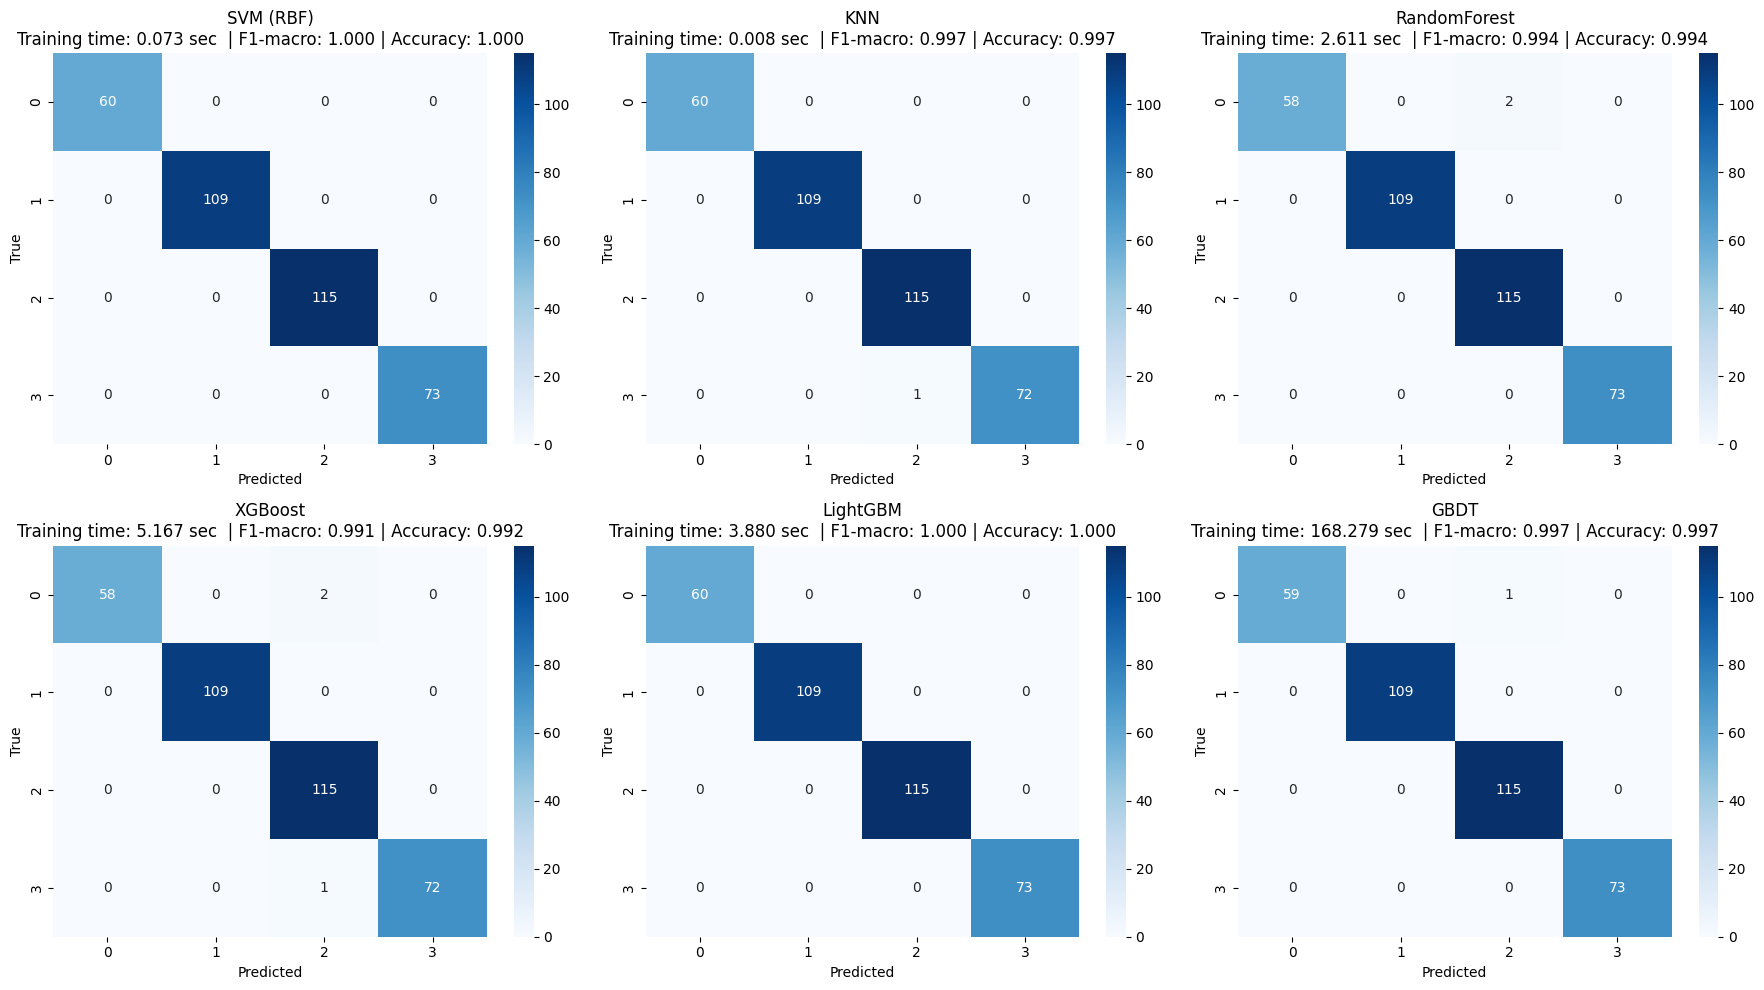


📁 Confusion matrices salvate in:Confusion Matrices LLTF senza filtro - Links 2 and 4.png

📊 Summary of F1 Macro scores (+ training time):
          Model  F1_macro  Train_time_sec
0     SVM (RBF)  1.000000        0.073395
4      LightGBM  1.000000        3.880082
1           KNN  0.997194        0.008010
5          GBDT  0.996817      168.278618
2  RandomForest  0.993608        2.610537
3       XGBoost  0.990820        5.167362

📋 Full Classification Metrics Table (with training times):
           Model Class  Precision    Recall  F1-score  Support  Train_time_sec
0      SVM (RBF)     0   1.000000  1.000000  1.000000     60.0        0.073395
1      SVM (RBF)     1   1.000000  1.000000  1.000000    109.0        0.073395
2      SVM (RBF)     2   1.000000  1.000000  1.000000    115.0        0.073395
3      SVM (RBF)     3   1.000000  1.000000  1.000000     73.0        0.073395
4            KNN     0   1.000000  1.000000  1.000000     60.0        0.008010
5            KNN     1   1.000000

In [84]:
results_lltf = train_classifiers_2(df_filtrato_lltf,titolo_suffix="Confusion Matrices LLTF senza filtro - Links 2 and 4")

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:47:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436032
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 1720
[LightGBM] [Info] Start training from score -1.711263
[LightGBM] [Info] Start training from score -1.204366
[LightGBM] [Info] Start training from score -1.143279
[LightGBM] [Info] Start training from score -1.605902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


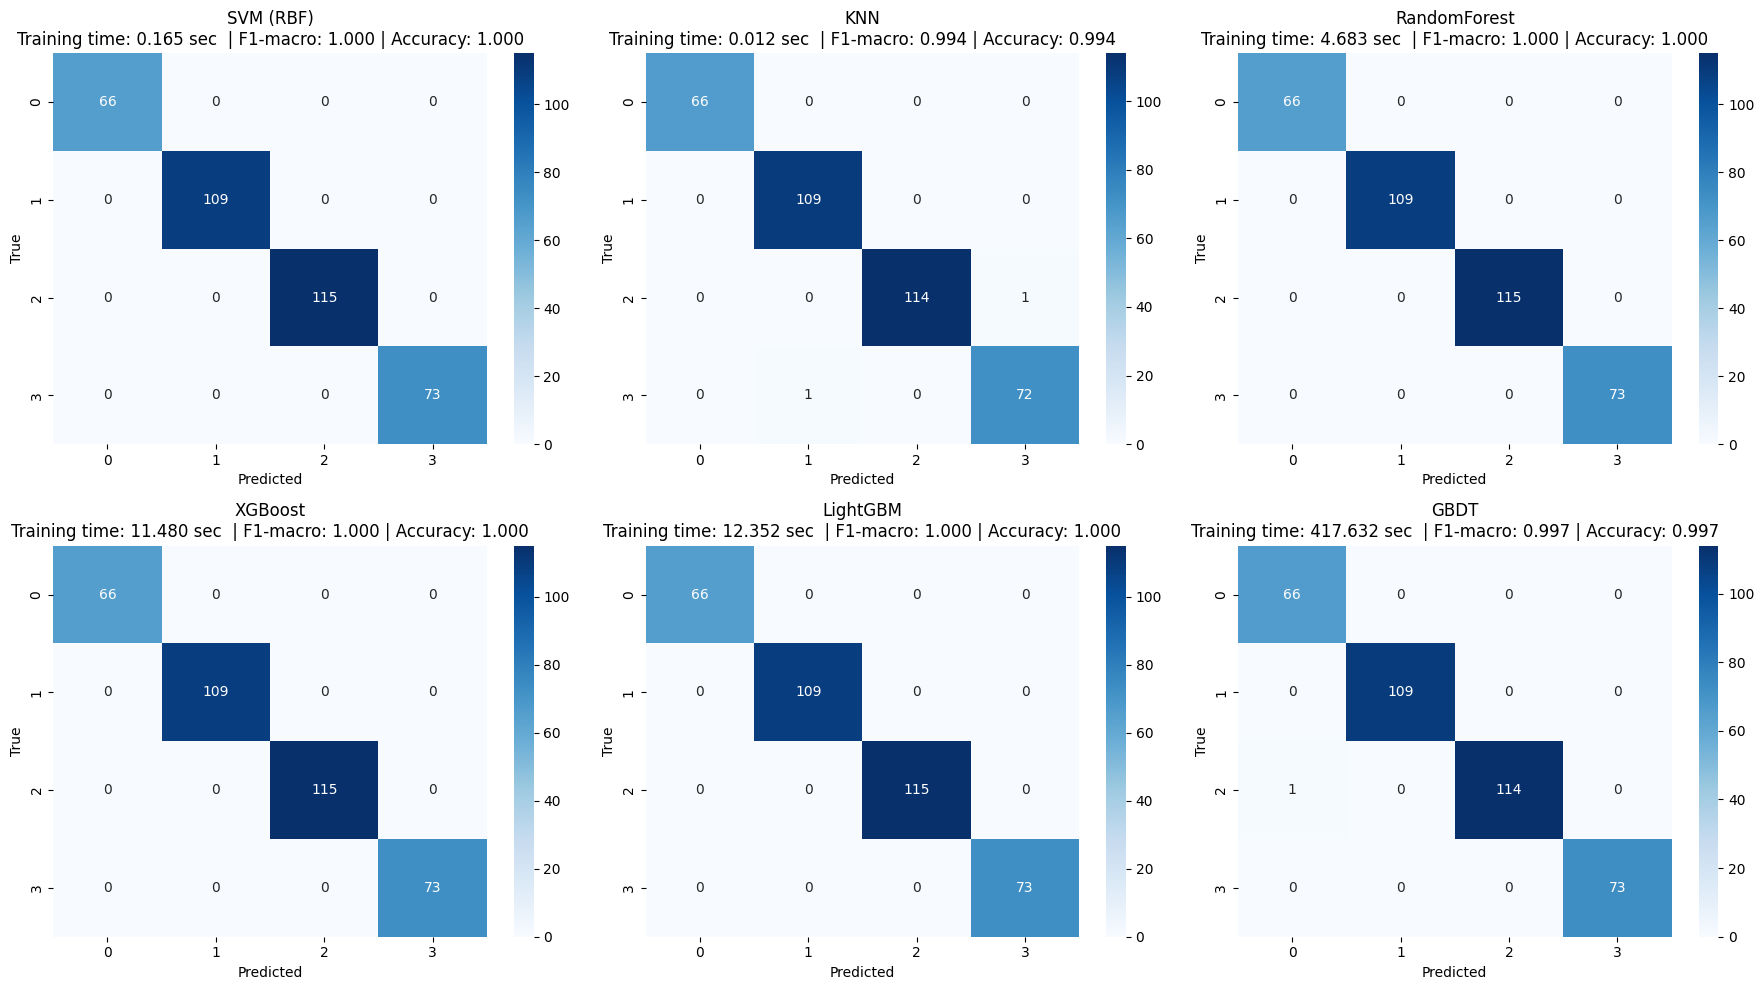


📁 Confusion matrices salvate in:Confusion Matrices HTLTF senza filtro - Links 2 and 4.png

📊 Summary of F1 Macro scores (+ training time):
          Model  F1_macro  Train_time_sec
0     SVM (RBF)  1.000000        0.164594
2  RandomForest  1.000000        4.682696
4      LightGBM  1.000000       12.351712
3       XGBoost  1.000000       11.479924
5          GBDT  0.997029      417.631538
1           KNN  0.994342        0.012477

📋 Full Classification Metrics Table (with training times):
           Model Class  Precision    Recall  F1-score  Support  Train_time_sec
0      SVM (RBF)     0   1.000000  1.000000  1.000000     66.0        0.164594
1      SVM (RBF)     1   1.000000  1.000000  1.000000    109.0        0.164594
2      SVM (RBF)     2   1.000000  1.000000  1.000000    115.0        0.164594
3      SVM (RBF)     3   1.000000  1.000000  1.000000     73.0        0.164594
4            KNN     0   1.000000  1.000000  1.000000     66.0        0.012477
5            KNN     1   0.99090

In [85]:
results_htltf = train_classifiers_2(df_filtrato_htltf,titolo_suffix="Confusion Matrices HTLTF senza filtro - Links 2 and 4")

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:54:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.210219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 871194
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score -1.711263
[LightGBM] [Info] Start training from score -1.204366
[LightGBM] [Info] Start training from score -1.143279
[LightGBM] [Info] Start training from score -1.605902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


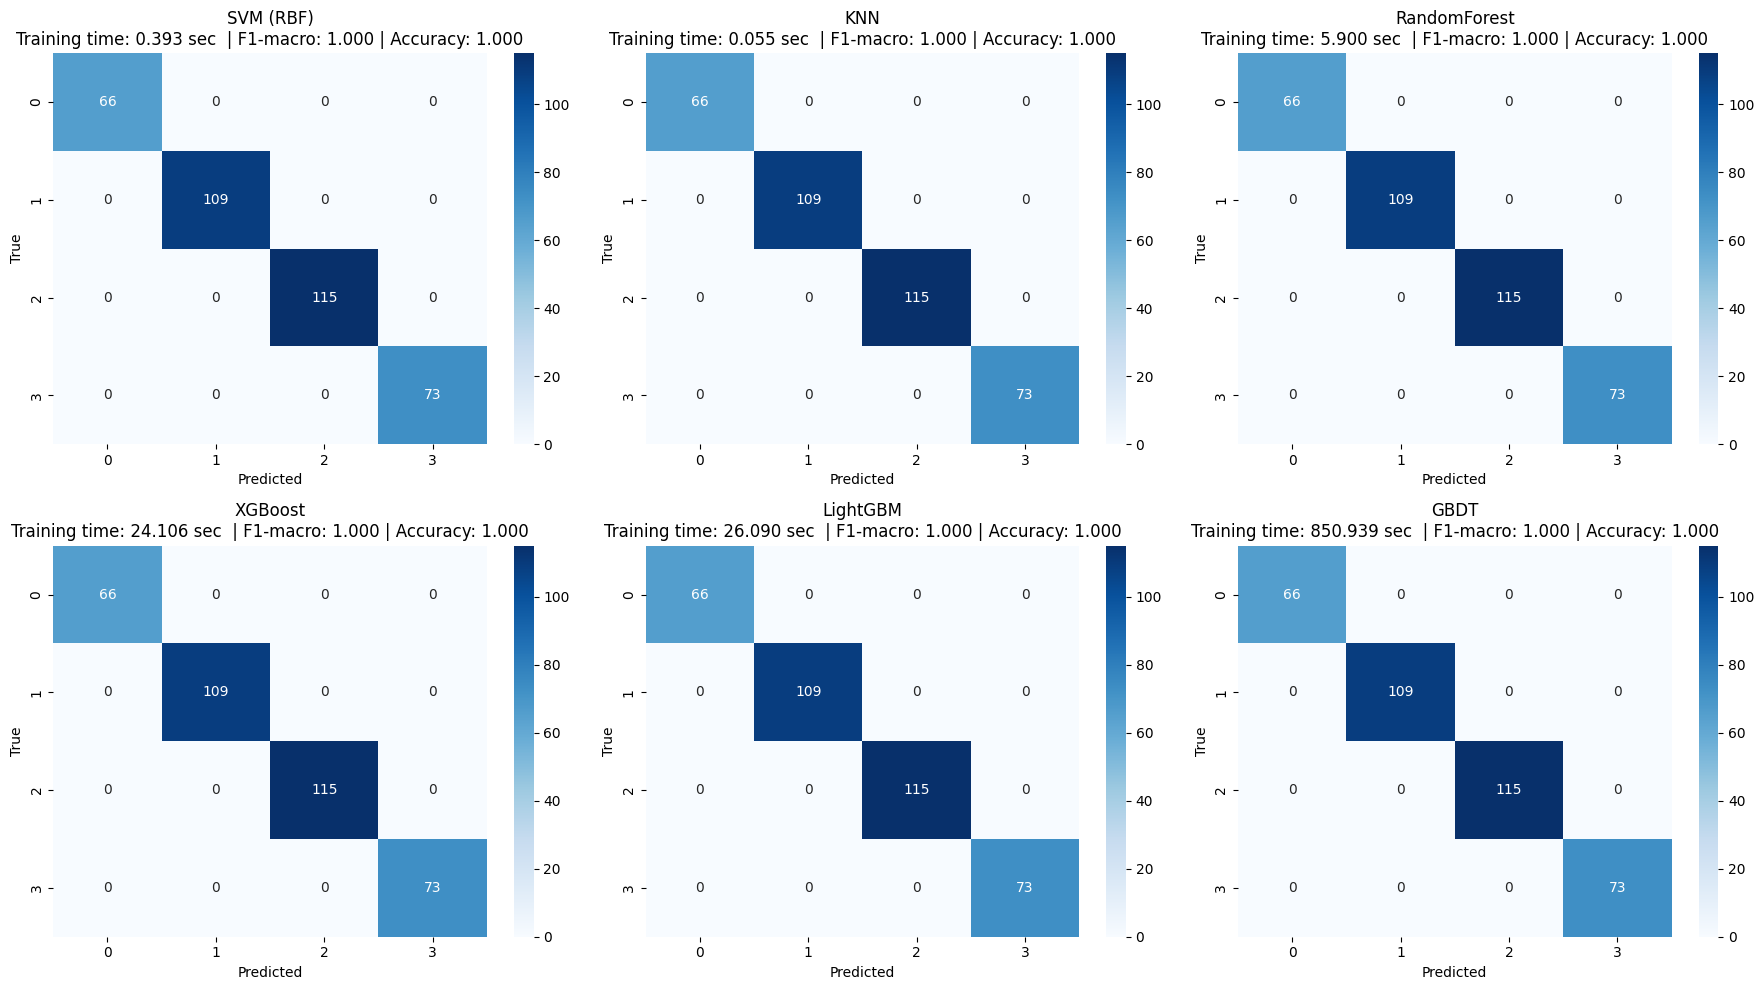


📁 Confusion matrices salvate in:Confusion Matrices HTLTF  senza filtro- All Links.png

📊 Summary of F1 Macro scores (+ training time):
          Model  F1_macro  Train_time_sec
0     SVM (RBF)       1.0        0.393198
1           KNN       1.0        0.054939
2  RandomForest       1.0        5.900396
3       XGBoost       1.0       24.106124
4      LightGBM       1.0       26.089657
5          GBDT       1.0      850.939478

📋 Full Classification Metrics Table (with training times):
           Model Class  Precision  Recall  F1-score  Support  Train_time_sec
0      SVM (RBF)     0        1.0     1.0       1.0     66.0        0.393198
1      SVM (RBF)     1        1.0     1.0       1.0    109.0        0.393198
2      SVM (RBF)     2        1.0     1.0       1.0    115.0        0.393198
3      SVM (RBF)     3        1.0     1.0       1.0     73.0        0.393198
4            KNN     0        1.0     1.0       1.0     66.0        0.054939
5            KNN     1        1.0     1.0       

In [86]:
f1_df, metrics_df = train_classifiers_2(expanded_features_htltf, titolo_suffix="Confusion Matrices HTLTF  senza filtro- All Links")

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:10:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223204
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score -1.790560
[LightGBM] [Info] Start training from score -1.187699
[LightGBM] [Info] Start training from score -1.126612
[LightGBM] [Info] Start training from score -1.589235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


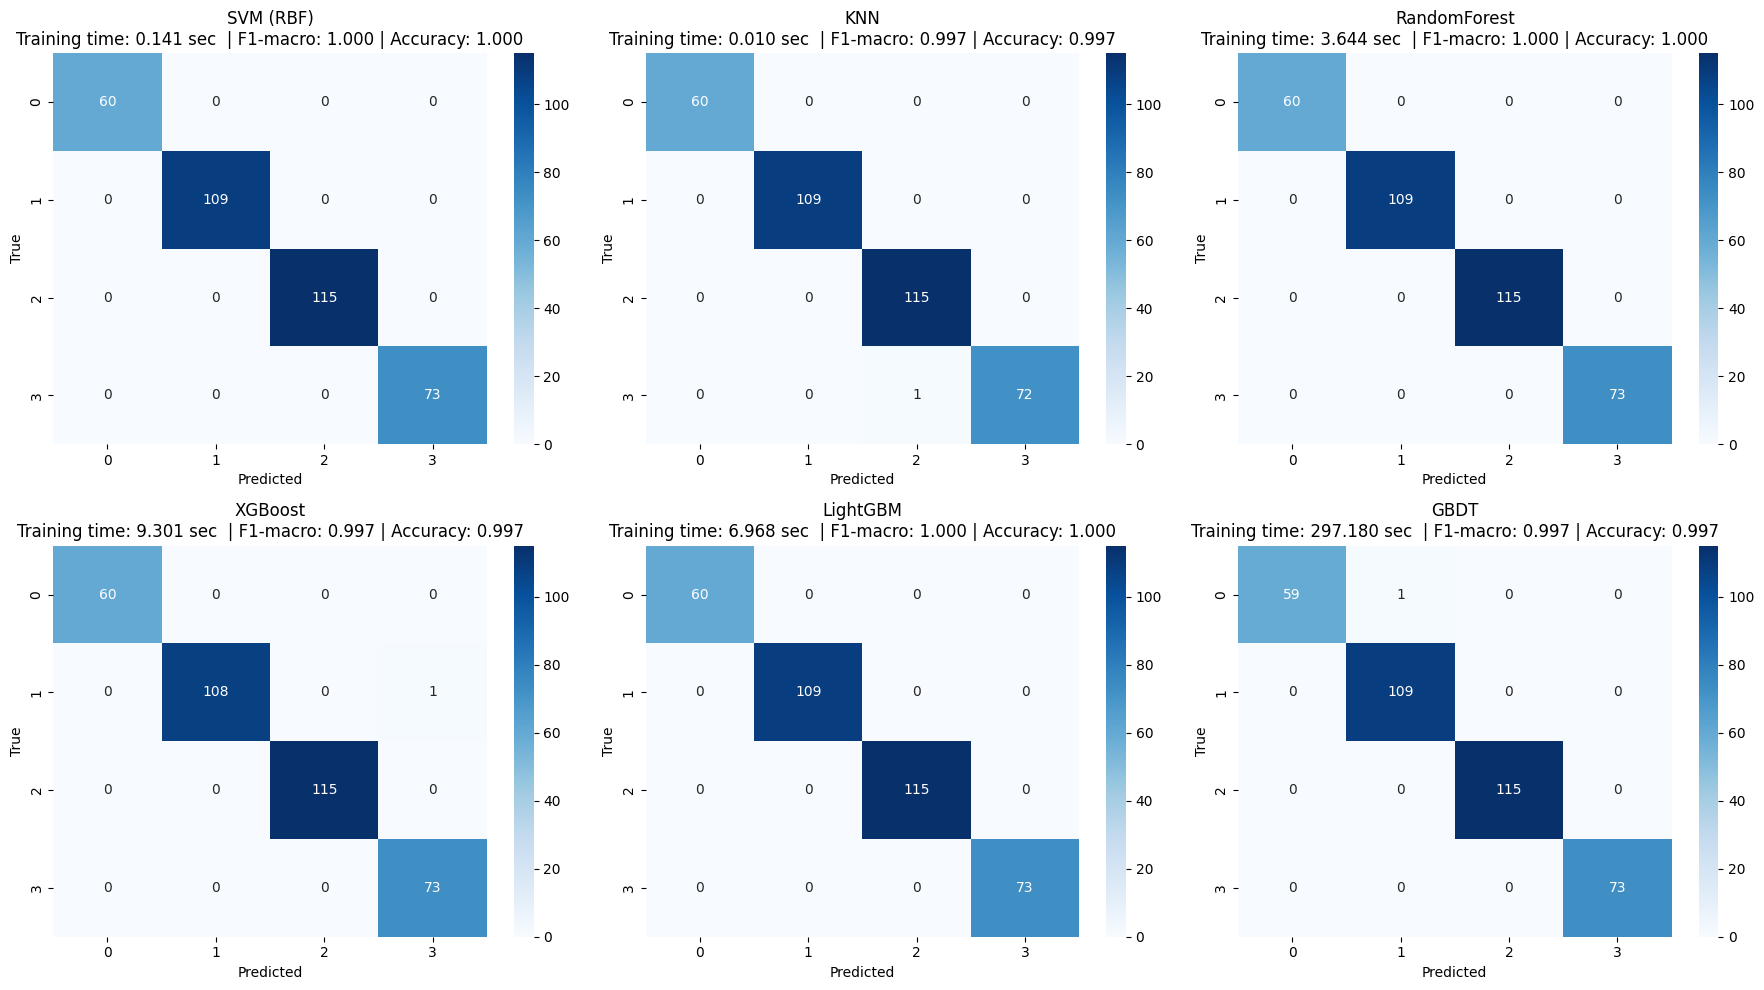


📁 Confusion matrices salvate in:Confusion Matrices LLTF senza filtro - All Links.png

📊 Summary of F1 Macro scores (+ training time):
          Model  F1_macro  Train_time_sec
0     SVM (RBF)  1.000000        0.140903
2  RandomForest  1.000000        3.644227
4      LightGBM  1.000000        6.967961
1           KNN  0.997194        0.010382
3       XGBoost  0.997147        9.300825
5          GBDT  0.996758      297.179709

📋 Full Classification Metrics Table (with training times):
           Model Class  Precision    Recall  F1-score  Support  Train_time_sec
0      SVM (RBF)     0   1.000000  1.000000  1.000000     60.0        0.140903
1      SVM (RBF)     1   1.000000  1.000000  1.000000    109.0        0.140903
2      SVM (RBF)     2   1.000000  1.000000  1.000000    115.0        0.140903
3      SVM (RBF)     3   1.000000  1.000000  1.000000     73.0        0.140903
4            KNN     0   1.000000  1.000000  1.000000     60.0        0.010382
5            KNN     1   1.000000  1.

In [87]:
f1_df, metrics_df = train_classifiers_2(expanded_features_lltf, titolo_suffix="Confusion Matrices LLTF senza filtro - All Links")

In [88]:
def train_regressors_2(dataset, target_col="target", titolo_suffix="Regression Results"):

    # --------------------------
    # PREPROCESSING
    # --------------------------
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # --------------------------
    # MODELLI DI REGRESSIONE
    # --------------------------
    models = {
        "SVR (RBF)": SVR(kernel="rbf", C=10, gamma="scale"),
        "KNN Regr": KNeighborsRegressor(n_neighbors=5),
        "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
        "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    metrics_list = []

    # --------------------------
    # FIGURA UNICA DEI PLOT
    # --------------------------
    n_models = len(models)
    n_cols = 3
    n_rows = math.ceil(n_models / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    for idx, (name, model) in enumerate(models.items()):

        # --- TEMPO DI TRAINING ---
        start = time.perf_counter()
        model.fit(X_train, y_train)
        train_time = time.perf_counter() - start

        # Predizione
        y_pred = model.predict(X_test)

        # --------------------------
        # CALCOLO METRICHE
        # --------------------------
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        metrics_list.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R2": r2,
            "Train_time_sec": train_time
        })

        # --------------------------
        # SCATTER PLOT TRUE vs PRED
        # --------------------------
        ax = axes[idx]
        sns.scatterplot(x=y_test, y=y_pred, ax=ax, s=20, alpha=0.6)
        ax.set_title(f"{name}\nTraining time: {train_time:.3f} sec | RMSE: {rmse:.4f} | R2: {r2:.4f}")
        ax.set_xlabel("True")
        ax.set_ylabel("Predicted")
        ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

    # rimuovere subplot vuoti
    for i in range(idx+1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig(f"regression_results_{titolo_suffix.replace(' ', '_').lower()}.png", dpi=300)
    plt.show()

    print(f"\n📁 Figura salvata in: regression_results_{titolo_suffix.replace(' ', '_').lower()}.png")

    # --------------------------
    # TABELLA METRICHE
    # --------------------------
    metrics_df = pd.DataFrame(metrics_list)

    metrics_df_sorted = metrics_df.sort_values("RMSE", ascending=True)

    print("\n📊 Regression Metrics (sorted by RMSE):")
    print(metrics_df_sorted)


    return metrics_df_sorted


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436020
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 1720
[LightGBM] [Info] Start training from score 1.548996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


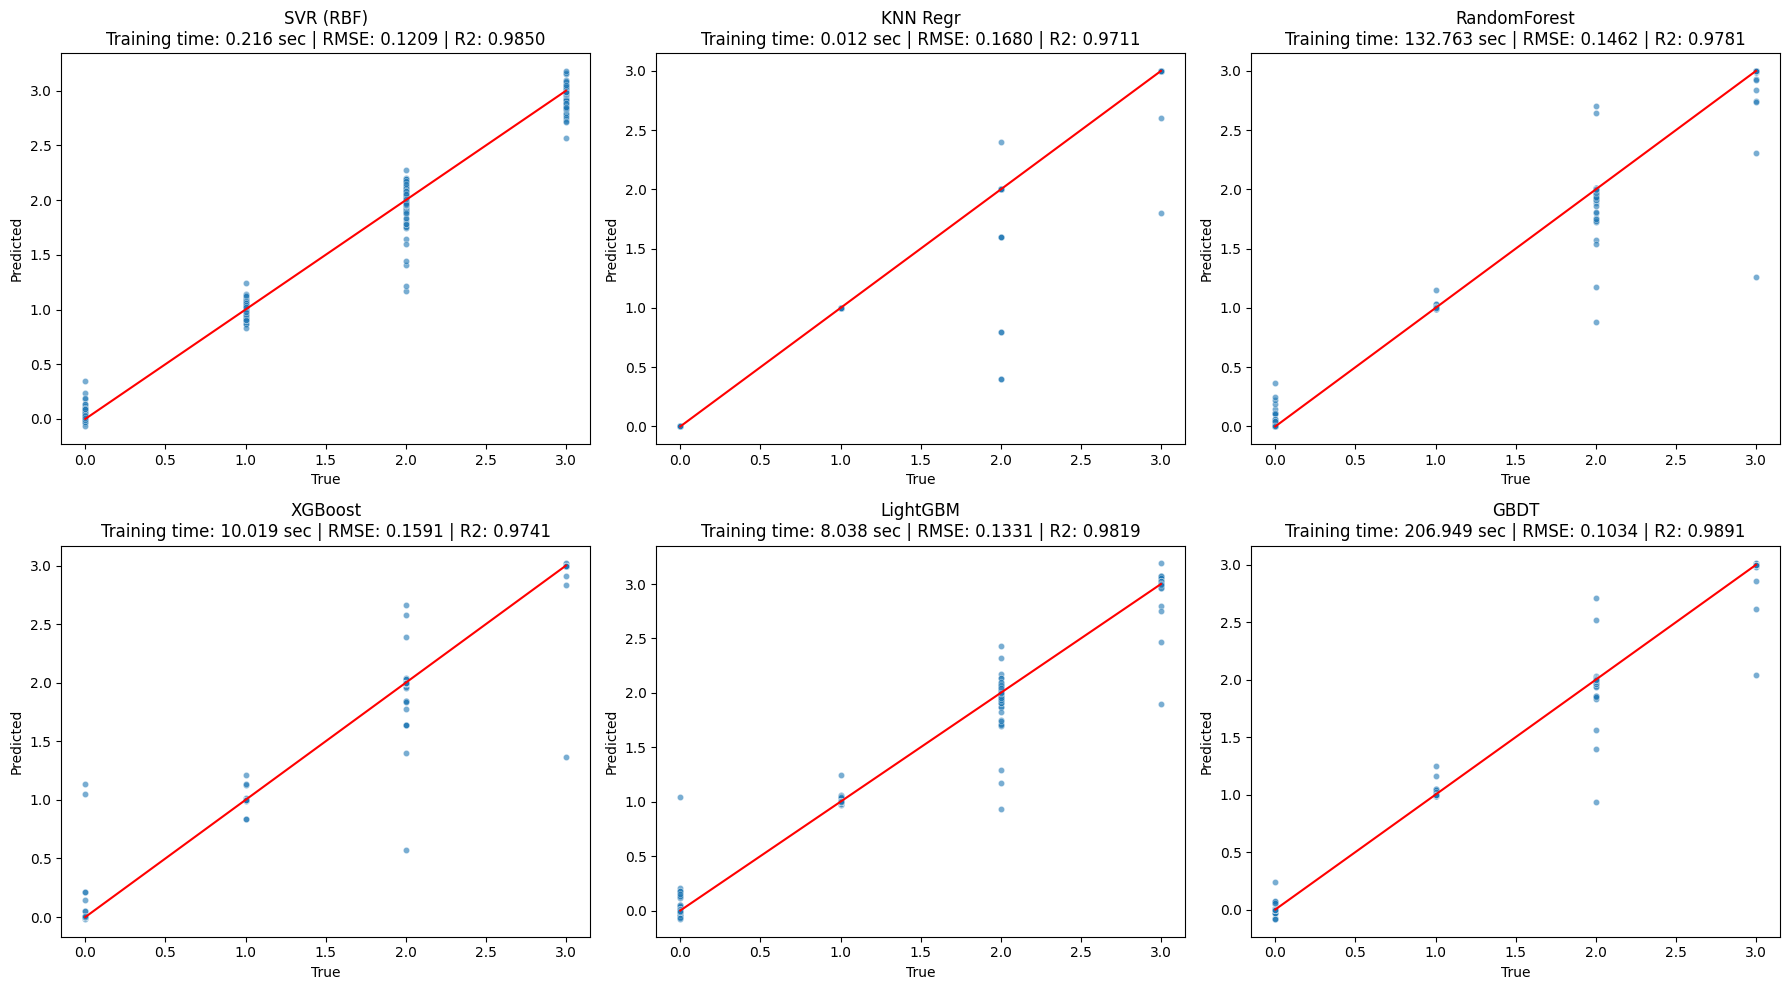


📁 Figura salvata in: regression_results_regression_results_htltf_senza_filtro_-_links_2_and_4.png

📊 Regression Metrics (sorted by RMSE):
          Model       MAE       MSE      RMSE        R2  Train_time_sec
5          GBDT  0.022127  0.010684  0.103365  0.989065      206.949049
0     SVR (RBF)  0.075454  0.014619  0.120908  0.985038        0.216257
4      LightGBM  0.046968  0.017715  0.133098  0.981869        8.037557
2  RandomForest  0.035386  0.021381  0.146223  0.978116      132.762817
3       XGBoost  0.031367  0.025308  0.159084  0.974098       10.019338
1      KNN Regr  0.024242  0.028209  0.167956  0.971128        0.012118


In [89]:
metrics_df_sorted_htltf= train_regressors_2(df_filtrato_htltf, titolo_suffix="Regression Results HTLTF senza filtro - Links 2 and 4")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.181736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 871636
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score 1.548996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


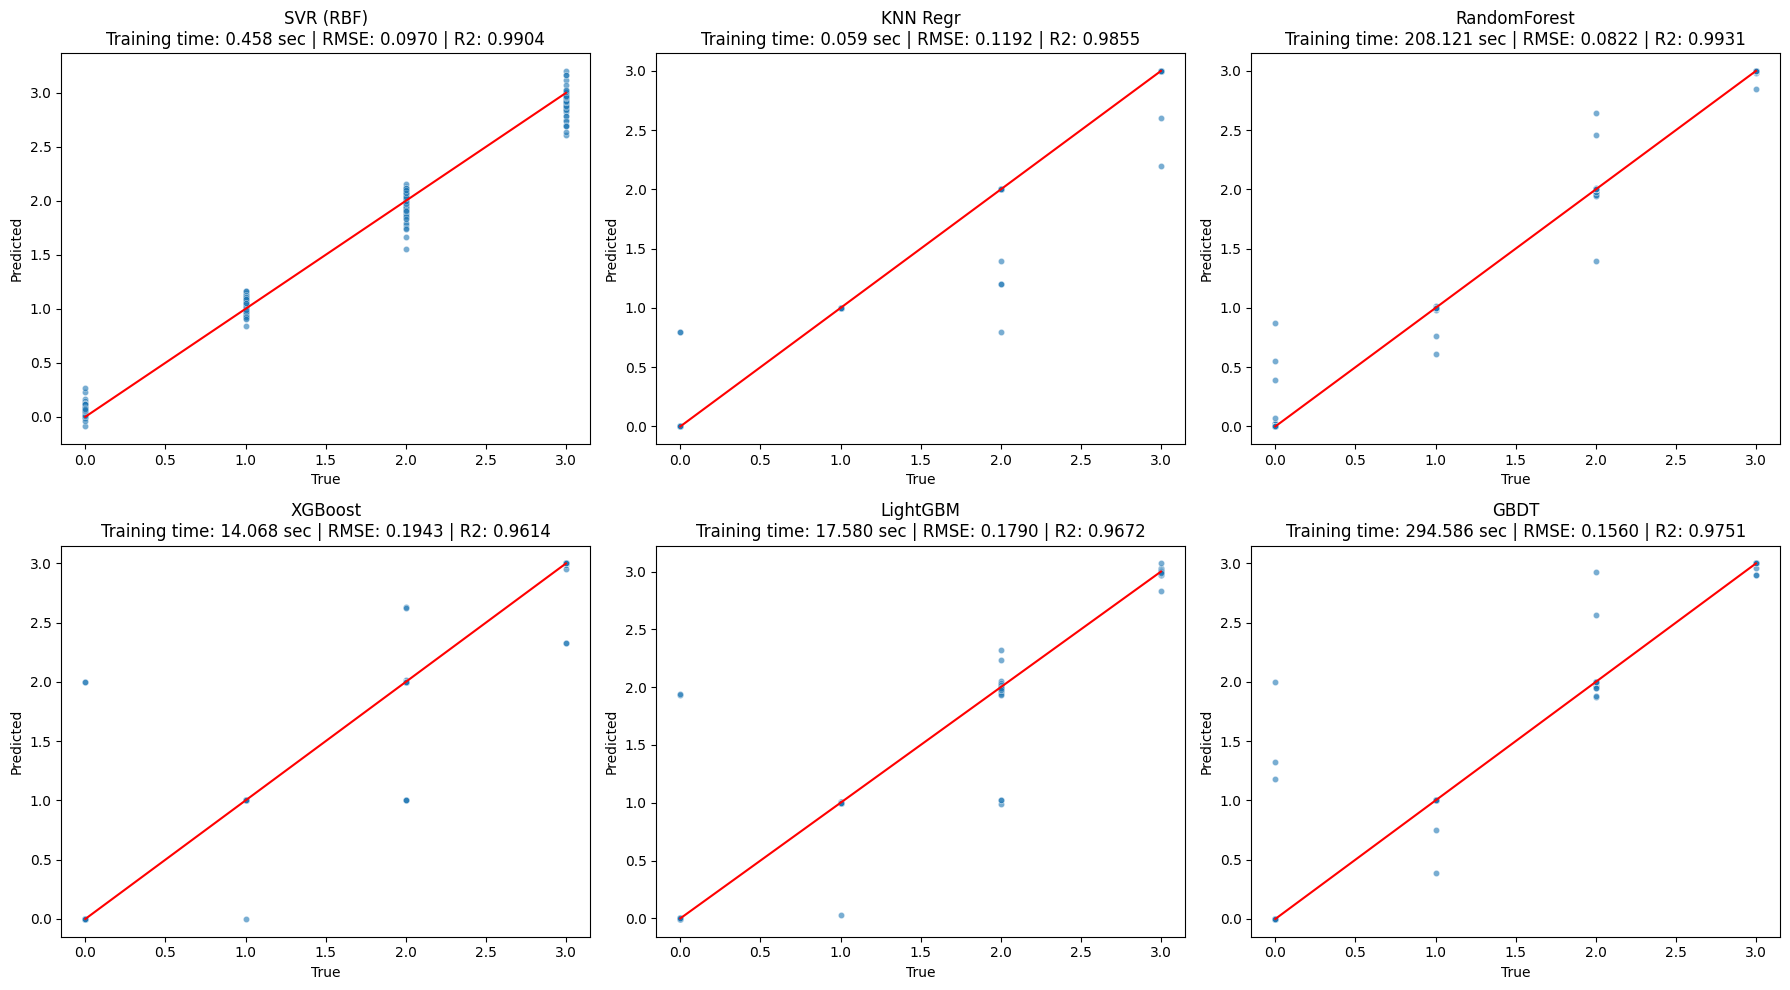


📁 Figura salvata in: regression_results_regression_results_htltf_senza_filtro_-_all_links.png

📊 Regression Metrics (sorted by RMSE):
          Model       MAE       MSE      RMSE        R2  Train_time_sec
2  RandomForest  0.013485  0.006750  0.082161  0.993091      208.120542
0     SVR (RBF)  0.073127  0.009410  0.097005  0.990369        0.457709
1      KNN Regr  0.017080  0.014215  0.119226  0.985451        0.059428
5          GBDT  0.020735  0.024345  0.156028  0.975083      294.585863
4      LightGBM  0.029133  0.032026  0.178958  0.967221       17.579608
3       XGBoost  0.029476  0.037736  0.194257  0.961378       14.067863


In [90]:
metrics_df_sorted_HTLTF= train_regressors_2(expanded_features_htltf, titolo_suffix="Regression Results HTLTF senza filtro - All Links")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112394
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 824
[LightGBM] [Info] Start training from score 1.597839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


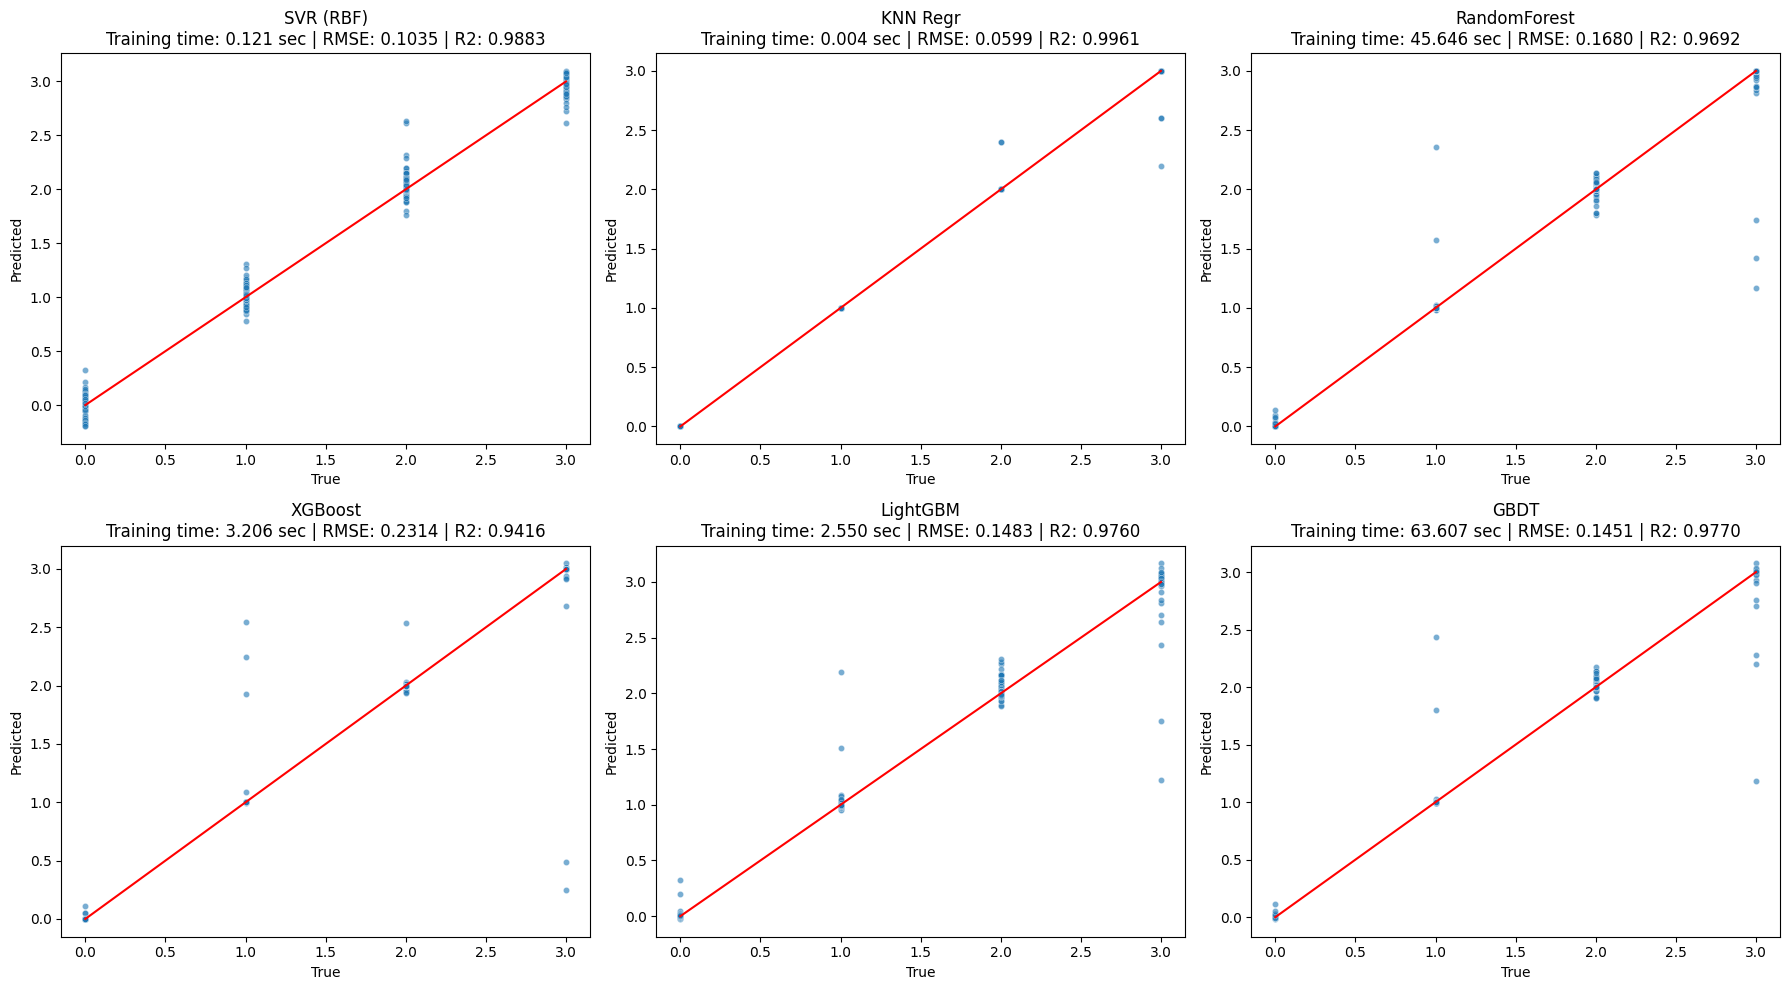


📁 Figura salvata in: regression_results_regression_results_lltf_senza_filtro_-_links_2_and_4.png

📊 Regression Metrics (sorted by RMSE):
          Model       MAE       MSE      RMSE        R2  Train_time_sec
1      KNN Regr  0.006723  0.003585  0.059878  0.996088        0.004029
0     SVR (RBF)  0.073081  0.010715  0.103512  0.988309        0.120608
5          GBDT  0.026265  0.021040  0.145051  0.977044       63.606794
4      LightGBM  0.040105  0.021997  0.148313  0.975999        2.549828
2  RandomForest  0.031134  0.028212  0.167965  0.969218       45.645851
3       XGBoost  0.030310  0.053569  0.231449  0.941551        3.206108


In [91]:
metrics_df_sorted_lltf= train_regressors_2(df_filtrato_lltf, titolo_suffix="Regression Results LLTF senza filtro - Links 2 and 4")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 224380
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score 1.597839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


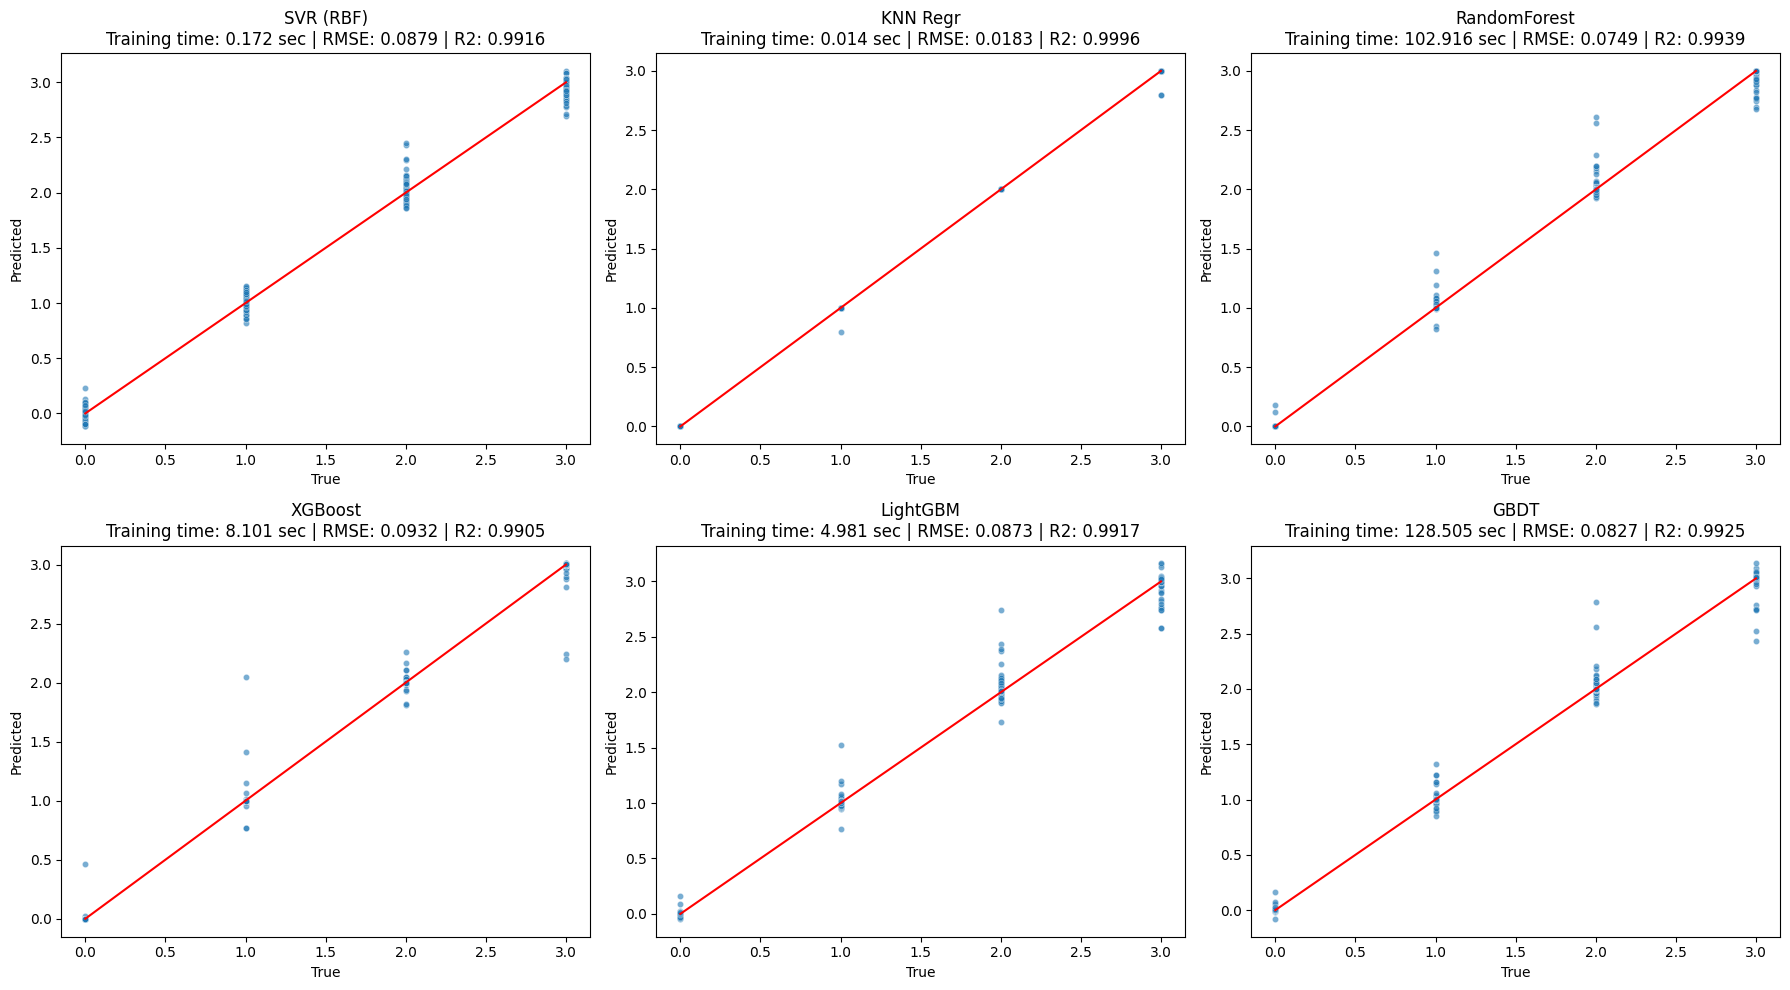


📁 Figura salvata in: regression_results_regression_results_lltf_senza_filtro_-_all_links.png

📊 Regression Metrics (sorted by RMSE):
          Model       MAE       MSE      RMSE        R2  Train_time_sec
1      KNN Regr  0.001681  0.000336  0.018334  0.999633        0.013892
2  RandomForest  0.023361  0.005608  0.074884  0.993882      102.915554
5          GBDT  0.028351  0.006832  0.082654  0.992546      128.505230
4      LightGBM  0.038531  0.007616  0.087269  0.991690        4.980974
0     SVR (RBF)  0.066733  0.007733  0.087940  0.991562        0.172041
3       XGBoost  0.018026  0.008690  0.093219  0.990519        8.101423


In [92]:
metrics_df_sorted_LLTF= train_regressors_2(expanded_features_lltf, titolo_suffix="Regression Results LLTF senza filtro - All Links")